<h1> <b> Business Growth Recommendation System for Retail Store Owners </b> </h1>

Every day a huge number of transactions take place across
multiple e-commerce platforms connecting a number of retail
stores and a huge amount of data from the customer transaction
is generated accordingly. This data generated is not utilized
effectively. The data can be utilized to draw meaningful
conclusions and predictions about the viability and profitability
of a product.
Due to rapid technological improvements, increased customer choices, and product customization, there is a constant
fluctuation in consumer demand. This leads to an increase
in uncertainty among retail store owners resulting in poor
decision-making and a huge loss in revenue.

The problem remaining unsolved results in retail store
owners being unaware of the customer’s liking of a product
as customer demands fluctuate constantly, leading to uncertainty and incorrect decision-making with respect to products
displayed in the market and a lack of purchasing of specific
items by the customers leads to tremendous loss to the owners
and wastage of products.


The main objective of the project is to build a Buisness Growth
recommendation system for retail store owners in order to
provide them with insights into what may be the necessary
steps that need to be taken to increase profits and help them
in identifying all the necessary steps and adopt strategies to
minimize expenses by identifying the products that are high in
demand in the market and take the longest to sell. The model
gives recommendations to the retail store owners based on the analysis of
customer purchase activity of an item like transaction history, frequency of selling a product, monetary value of customers and
recency of transaction.

Using the recommendation system the retail store owner
will be able to comprehend the demand for a particular item
for a given period of time, based on the customer’s activity
(transaction history,frequency of selling a product, recency of transaction, monetary value of customers) and based on that make long term strategies about the product’s viability in the market. Ultimately, the retail store owners can achieve a big boost in sales and avoid poor decision-making with respect to the
selling of products.

<a id="section-top"></a>
# Table of Contents
* [Introduction](#section-intro)

* [1. Preprocessing and Exploratory Data Analysis](#section-one)

* [2. Cohort Analysis](#section-two)
     - [2.1 Retention Rate](#section-two-one)


* [3. Pareto Principle](#section-three)
     - [3.1 Pareto Chart for Customers](#section-three-one)
     - [3.2 Pareto Chart for Products](#section-three-two)

* [4. Customer Lifetime Value](#section-four)

* [5. Segmentation of Customers using RFM Analysis](#section-five)

* [6. Clustering - Segmentation of Customers using K-Means Clustering](#section-six)

* [7. Apriori Algorithm](#section-seven)
    
* [8. Forecasting with Prophet](#section-eight)
     - [8.1 Data Preparation for Time Series](#section-eight-one)
         - [8.1.1 Weekly](#section-eight-one-one)
         - [8.1.2 Daily](#section-eight-one-two)
     - [8.2 Stationarity](#section-eight-two)
         - [8.2.1 Augmented Dickey-Fuller Test](#section-eight-two-one)
     - [8.3. Seasonality, Decomposition](#section-eight-three)
     - [8.4. Modelling](#section-eight-four)
         - [8.4.1 Simple Model](#section-eight-four-one)
         - [8.4.2 Prophet's parameters](#section-eight-four-two)
         - [8.4.3 Forecasting Future](#section-eight-four-three)

* [Conclusion](#section-conc)


**First version: 25.10.2022**

**Last Edit: 13.11.2022**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="section-intro"></a>

# Introduction

This is Online Retail dataset from UCI Machine Learning Repository. It contains transactions from 2010 and 2011.

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Prophet
import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from itertools import combinations
from datetime import datetime
import statsmodels.api as sm
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score, mean_squared_error
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from scipy import stats
from mpl_toolkits import mplot3d

pd.options.mode.chained_assignment = None # N warning message and no exception raised

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from matplotlib import style

plt.rcParams["axes.grid"] = 1


<a id="section-one"></a>

# 1) Preprocessing and Exploratory Data Analysis

Loading the dataset into a dataframe

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv", encoding= 'unicode_escape')
display(df.head())
print(df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(541909, 8)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We have missing values for column Description and CustomerID

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [ ]:
df[df.Description.isnull()].CustomerID.nunique()

0

In [ ]:
df[df.Description.isnull()].UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

When description is null, we have no available customer id and zero unit price for all data. Let's drop nan values.

In [ ]:
df = df[df.Description.notnull()]

In [ ]:
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


At first look, we can see records that have missing customer id, there is no specific characteristics.

StockCode contains non-numeric records i.e. DOT. It is a cue for examining stock codes.

In [ ]:
print("We have {} observations.".format(df.shape[0]))

df = df[df.CustomerID.notnull()]

print("We have {} observations after removing unknown customers.".format(df.shape[0]))

We have 540455 observations.
We have 406829 observations after removing unknown customers.


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

We then drop the duplicate rows from the data

In [ ]:
df = df.drop_duplicates()
df.shape

(401604, 8)

We are done with systematically missing values.

Sometimes the NULL values may be filled with text like 'NaN' or 'Missing' or '?' or '??'. 

We check for the presence of such values in the columns as they also classify as incomplete data which cannot be used for analysis

In [ ]:
df[df.isin(["NaN","missing","?","??"]).any(axis=1)].shape[0]

0

Next we remove all the rows which have a UnitPrice or Quantity as 0 as these rows cannot be used for further analysis

In [ ]:
df = df[(df["UnitPrice"]!=0)&(df["Quantity"]!=0)]
print(df)
print(df.shape)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [ ]:
df[df.Description.str.len() < 5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df.InvoiceNo.value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
546878       1
558333       1
C546870      1
C546868      1
564728       1
Name: InvoiceNo, Length: 22186, dtype: int64

InvoiceNo has coded with 6 digit numeric characters. We can see that some InvoiceNo records starts with the letter C. This means cancellation.

In [ ]:
df[df["InvoiceNo"].str.startswith("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Cancelled invoices have negative quantity.

In [ ]:
df["Cancelled"] = df["InvoiceNo"].apply(lambda x: 1 if x.startswith("C") else 0)

Can we have both cancellation record, and record before cancellation. I mean, for example, we have C536379, have we 536379 ?

In [ ]:
cancelled_invoiceNo = df[df.Cancelled == 1].InvoiceNo.tolist()
cancelled_invoiceNo = [x[1:] for x in cancelled_invoiceNo]

cancelled_invoiceNo[:5]

['536379', '536383', '536391', '536391', '536391']

In [ ]:
df[df["InvoiceNo"].isin(cancelled_invoiceNo)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled


Nothing, we have just cancellation.

Well, maybe we have different pattern about InvoiceNo. Let's check it

In [ ]:
df[df.InvoiceNo.str.len() != 6]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,1
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,1


No, we only have proper invoices and cancellations for InvoiceNo. We don't have any different pattern.

In [ ]:
df = df[df.Cancelled == 0]

In [ ]:
df = df[ df["Quantity"] > 0]
print(df.shape)

(392692, 9)


The stock code of a purchase usually has a length of either 5 or 6 (they may or maynot contain a character).

However any other length of the stock code is not possible hence we filter the data to only keep data entries which have the appropriate stock code.

In [ ]:
df = df[df.StockCode.str.len() >= 5]
print(df)
print(df.shape)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  Cancelled  

In [ ]:
df = df[df.StockCode.str.len() <= 6]
df.shape

(390859, 9)

In [ ]:
print(df[df.StockCode.str.contains("^[a-zA-Z]")].StockCode.value_counts())
print(df[df.StockCode.str.contains("^[a-zA-Z]")].Description.value_counts())

Series([], Name: StockCode, dtype: int64)
Series([], Name: Description, dtype: int64)


It looks like data contains more than customer transactions. We will drop them.

In [ ]:
df[df.StockCode.str.len() > 5].StockCode.value_counts()

85123A    2023
85099B    1615
82494L     816
85099C     656
85099F     656
          ... 
85031B       1
90024D       1
84877A       1
84743C       1
90214Z       1
Name: StockCode, Length: 873, dtype: int64

In [ ]:
df[df.StockCode.str.len() > 5].Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2016
JUMBO BAG RED RETROSPOT                1615
WOODEN FRAME ANTIQUE WHITE              816
JUMBO  BAG BAROQUE BLACK WHITE          656
JUMBO BAG STRAWBERRY                    656
                                       ... 
BLUE/GREEN SHELL NECKLACE W PENDANT       1
LILAC FEATHERS CURTAIN                    1
PINK CHERRY LIGHTS                        1
BLUE/NAT SHELL NECKLACE W PENDANT         1
GLASS BEAD HOOP EARRINGS AMETHYST         1
Name: Description, Length: 885, dtype: int64

Some stock codes have a letter at the end of their codes. Let's retain them

In [ ]:
df =  df[~ df.StockCode.str.contains("^[a-zA-Z]")]
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  Cancelled  

Standardize descriptions by converting them to all lowercase characters.

In [ ]:
df["Description"] = df["Description"].str.lower()

Stock Codes - Description

In [ ]:
df.groupby("StockCode")["Description"].nunique()[df.groupby("StockCode")["Description"].nunique() != 1]

StockCode
16156L    2
17107D    3
20622     2
20725     2
20914     2
         ..
85184C    2
85185B    2
90014A    2
90014B    2
90014C    2
Name: Description, Length: 213, dtype: int64

In [ ]:
df.CustomerID.value_counts()

17841.0    7663
14911.0    5574
14096.0    5093
12748.0    4395
14606.0    2669
           ... 
14424.0       1
17925.0       1
17948.0       1
16148.0       1
16257.0       1
Name: CustomerID, Length: 4334, dtype: int64

From the below graph it can be concluded that there are some customers who purchase items from the online retail store many more times than others do. 

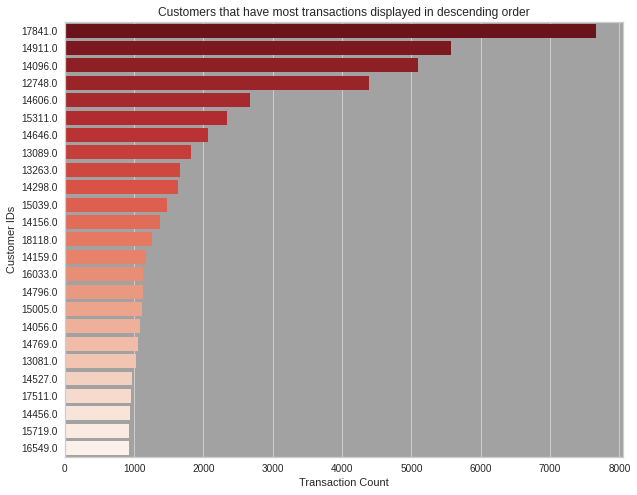

In [ ]:
customer_counts = df.CustomerID.value_counts().sort_values(ascending=False).head(25)

fig, ax = plt.subplots(figsize = (10, 8))

sns.barplot(y = customer_counts.index, x = customer_counts.values, orient = "h", 
            ax = ax, order = customer_counts.index, palette = "Reds_r")

plt.title("Customers that have most transactions displayed in descending order")
plt.ylabel("Customer IDs")
plt.xlabel("Transaction Count")

plt.show()

In [ ]:
df.Country.value_counts()

United Kingdom          348643
Germany                   8627
France                    8001
EIRE                      7113
Spain                     2417
Netherlands               2322
Belgium                   1932
Switzerland               1808
Portugal                  1416
Australia                 1179
Norway                    1047
Channel Islands            743
Italy                      741
Finland                    646
Cyprus                     601
Sweden                     427
Austria                    382
Denmark                    367
Poland                     322
Japan                      321
Israel                     245
Unspecified                241
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45
Lithuani

In the previous count we concluded that a very large portion of the items sold were in the United Kingdom. 

But when the number of transactions that take place in each country are calculated, the difference is not as much as expected.

This can be because most of the customers who purchase items in the United Kingdom buy multiple items in larger quantities than those of other countries who only utilize the services of the retail store to buy a few items in small quantites.

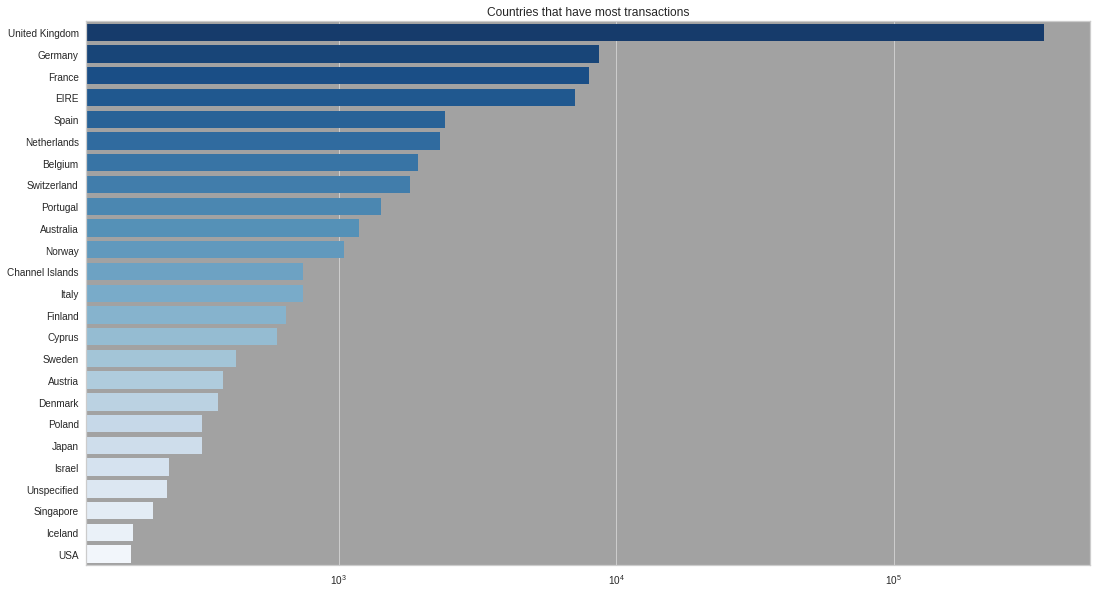

In [ ]:
country_counts = df.Country.value_counts().sort_values(ascending=False).head(25)

fig, ax = plt.subplots(figsize = (18, 10))

sns.barplot(x = country_counts.values, y = country_counts.index, orient = "h", 
            ax = ax, order = country_counts.index, palette = "Blues_r")
plt.title("Countries that have most transactions")
plt.xscale("log")
plt.show()

In [ ]:
df["UnitPrice"].describe()

count    390859.000000
mean          2.872124
std           4.285503
min           0.040000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

Check for 0 unit price

In [ ]:
df[df.UnitPrice == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled


In [ ]:
print("We have {} observations.".format(df.shape[0]))

df = df[df.UnitPrice > 0]

print("We have {} observations after removing records that have 0 unit price.".format(df.shape[0]))

We have 390859 observations.
We have 390859 observations after removing records that have 0 unit price.


Outlier Analysis

<AxesSubplot:ylabel='Quantity'>

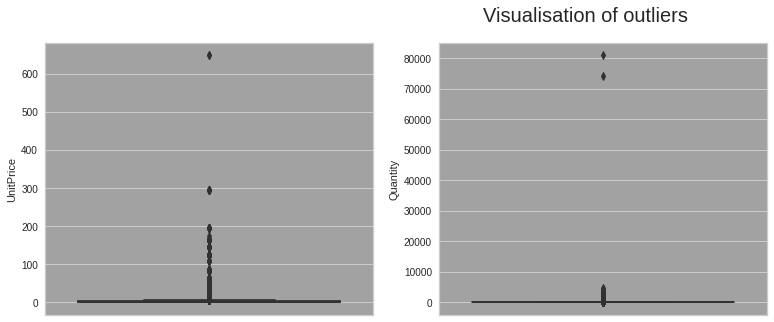

In [ ]:
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]

fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=df,y="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=df,y="Quantity")

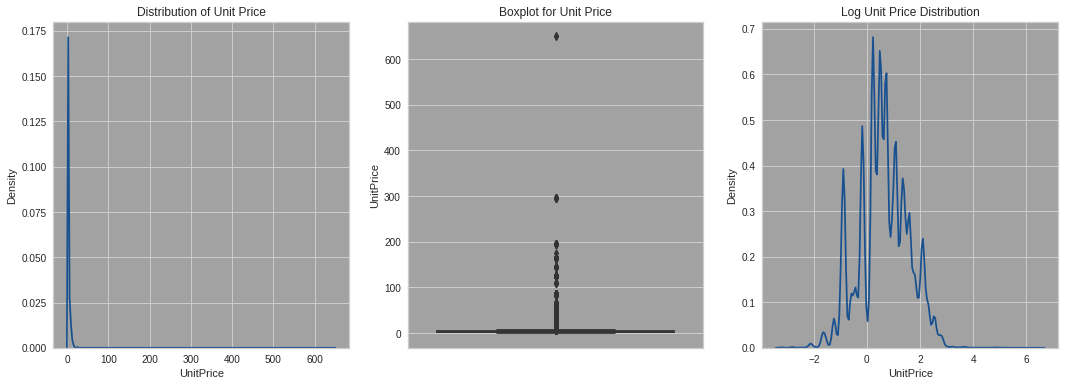

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(df["UnitPrice"], ax = axes[0], color = "#195190").set_title("Distribution of Unit Price")
sns.boxplot(y = df["UnitPrice"], ax = axes[1], color = "#195190").set_title("Boxplot for Unit Price")
sns.kdeplot(np.log(df["UnitPrice"]), ax = axes[2], color = "#195190").set_title("Log Unit Price Distribution")

plt.show()

In [ ]:
print("Lower limit for UnitPrice: " + str(np.exp(-2)))
print("Upper limit for UnitPrice: " + str(np.exp(3)))
print(np.quantile(df.UnitPrice, 0.99))

Lower limit for UnitPrice: 0.1353352832366127
Upper limit for UnitPrice: 20.085536923187668
12.75


In [ ]:
print("We have {} observations.".format(df.shape[0]))

df = df[(df.UnitPrice > 0.1) & (df.UnitPrice < 20)]

print("We have {} observations after removing unit prices smaller than 0.1 and greater than 20.".format(df.shape[0]))

We have 390859 observations.
We have 389910 observations after removing unit prices smaller than 0.1 and greater than 20.


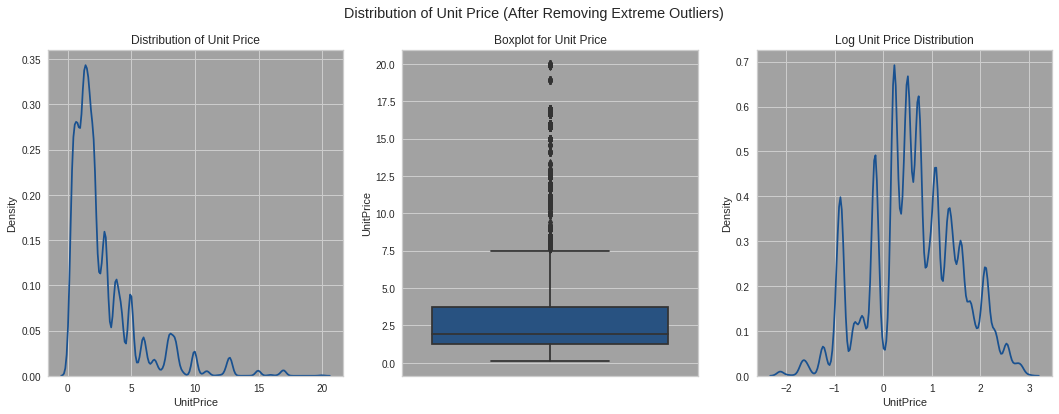

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(df["UnitPrice"], ax = axes[0], color = "#195190").set_title("Distribution of Unit Price")
sns.boxplot(y = df["UnitPrice"], ax = axes[1], color = "#195190").set_title("Boxplot for Unit Price")
sns.kdeplot(np.log(df["UnitPrice"]), ax = axes[2], color = "#195190").set_title("Log Unit Price Distribution")

fig.suptitle("Distribution of Unit Price (After Removing Extreme Outliers)")
plt.show()

In [ ]:
df["Quantity"].describe()

count    389910.000000
mean         13.080934
std         180.901326
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

We observe

75%          12.000000

max       80995.000000

Let's look at these outliers.

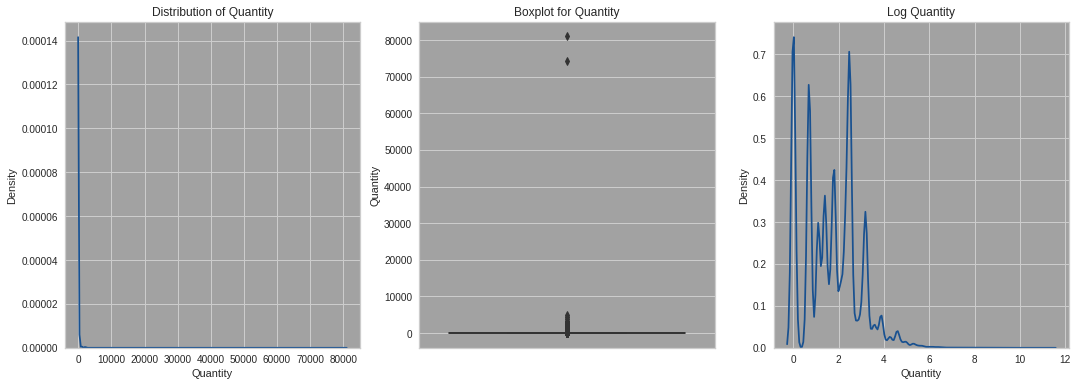

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(df["Quantity"], ax = axes[0], color = "#195190").set_title("Distribution of Quantity")
sns.boxplot(y = df["Quantity"], ax = axes[1], color = "#195190").set_title("Boxplot for Quantity")
sns.kdeplot(np.log(df["Quantity"]), ax = axes[2], color = "#195190").set_title("Log Quantity")
plt.show()

In [ ]:
print("Upper limit for Quantity: " + str(np.exp(5)))
np.quantile(df.Quantity, 0.99)

Upper limit for Quantity: 148.4131591025766


120.0

In [ ]:
print("We have {} observations.".format(df.shape[0]))

df = df[(df.Quantity < 148)]

print("We have {} observations after removing quantities greater than 148.".format(df.shape[0]))

We have 389910 observations.
We have 387263 observations after removing quantities greater than 148.


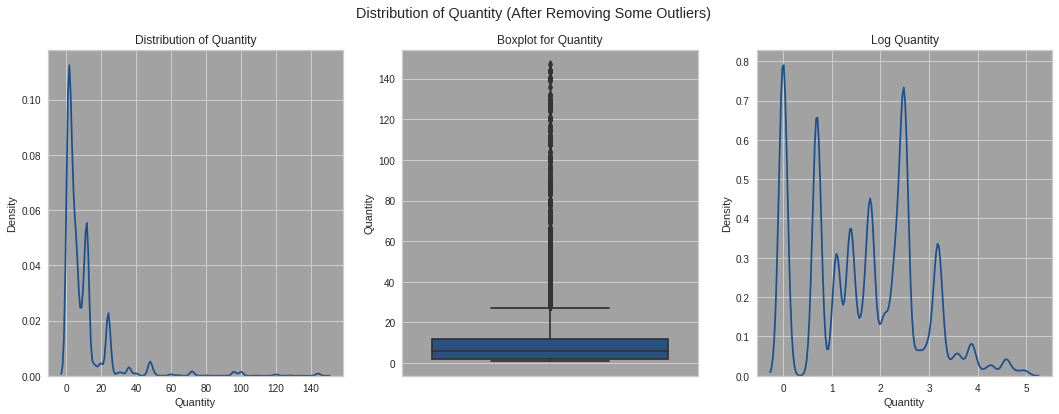

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(df["Quantity"], ax = axes[0], color = "#195190").set_title("Distribution of Quantity")
sns.boxplot(y = df["Quantity"], ax = axes[1], color = "#195190").set_title("Boxplot for Quantity")
sns.kdeplot(np.log(df["Quantity"]), ax = axes[2], color = "#195190").set_title("Log Quantity")

fig.suptitle("Distribution of Quantity (After Removing Some Outliers)")
plt.show()

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.drop("Cancelled", axis = 1, inplace = True)
df.to_csv("online_retail_final.csv", index = False)

<AxesSubplot:ylabel='TotalPrice'>

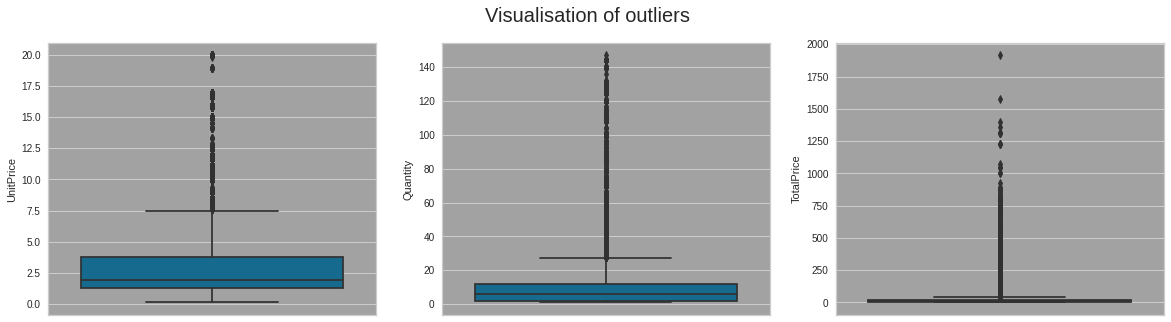

In [ ]:
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]

fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=df,y="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=df,y="Quantity")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=df,y="TotalPrice")

In [ ]:
general_sales_trend = pd.DataFrame(data={'Date':pd.to_datetime(df.InvoiceDate).dt.date,
                                  'Total price':df.Quantity*df.UnitPrice})
general_sales_trend = general_sales_trend.groupby("Date")["Total price"].sum()
general_sales_trend = pd.DataFrame(general_sales_trend)

In [ ]:
dates = []
dates.append(pd.to_datetime("201012",format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month),format="%Y%m") for month in range(1,13)]

In [ ]:
rolling_days = general_sales_trend.copy()
rolling_days["Total price"] = rolling_days["Total price"].rolling(window=30).mean() 

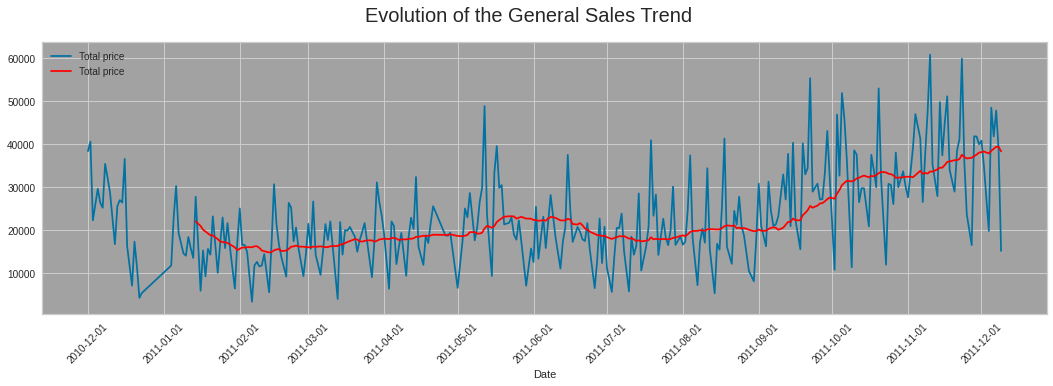

In [ ]:
plt.figure(figsize = (18,5)).suptitle('Evolution of the General Sales Trend', fontsize=20)
sns.lineplot(data=general_sales_trend)
sns.lineplot(data=rolling_days, palette=['red'])
plt.xticks(dates,rotation = 45)
plt.show()

In [ ]:
general_sales_trend.index = pd.to_datetime(general_sales_trend.index)
general_sales_trend_months = general_sales_trend.groupby([general_sales_trend.index.year,general_sales_trend.index.month])['Total price'].sum()
general_sales_trend_months = pd.DataFrame(general_sales_trend_months)
print(general_sales_trend_months)

           Total price
Date Date             
2010 12      473645.26
2011 1       400112.60
     2       383198.44
     3       499302.63
     4       388020.99
     5       576374.11
     6       500090.52
     7       492216.34
     8       509963.97
     9       772359.50
     10      836616.15
     11     1008965.38
     12      287356.32


In [ ]:
general_sales_trend_months["Date"] = dates

From the below plot it can be concluded that the sales tend to peak around november which is when most people will tend to buy presents for loved ones as christmas is approaching.

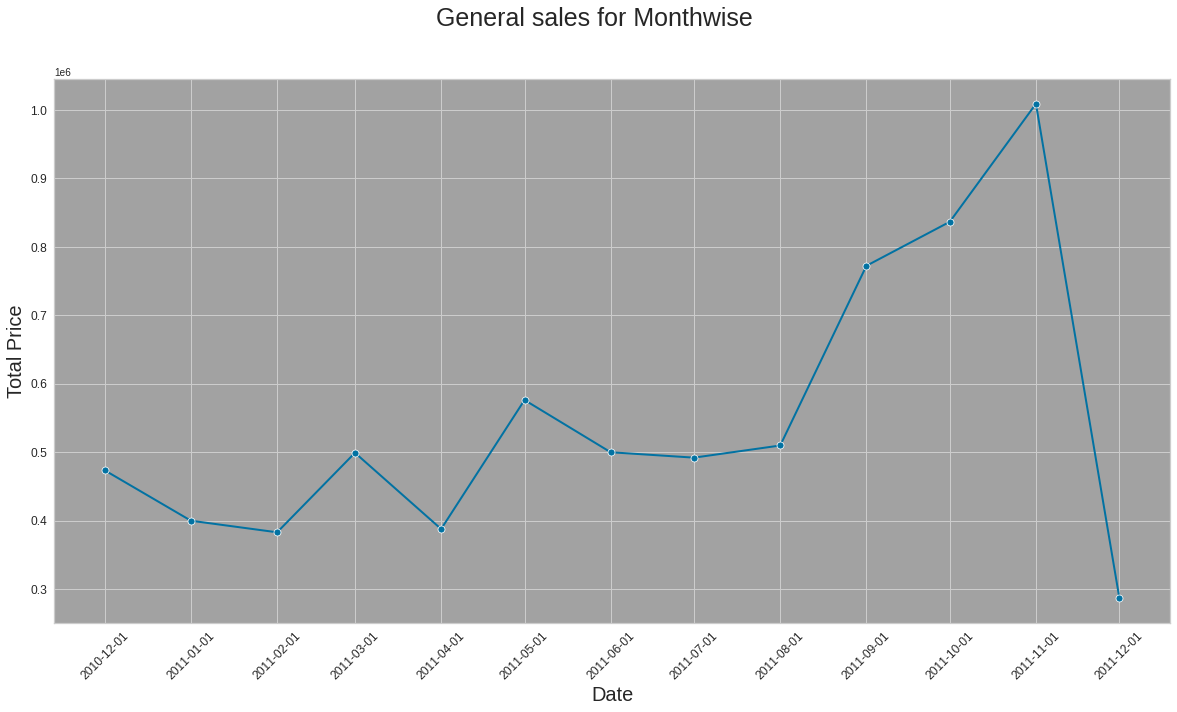

In [ ]:
plt.figure(figsize = (20,10)).suptitle('General sales for Monthwise', fontsize=25)
lineplot = sns.lineplot(data=general_sales_trend_months,x="Date", y="Total price", marker="o",linewidth = 2)


lineplot.set_xlabel(xlabel="Date",size = 20)
lineplot.set_ylabel(ylabel="Total Price",size = 20)
plt.yticks(fontsize=12)
plt.xticks(dates,rotation = 45,fontsize=12)

plt.show()

From this curve giving the sales trend between december 2010 and december 2011, it seems that the general sales was quite stable untill august 2011. The general sales increases drastically and are almost multiplied by 3. This increase may also be linked to end of the year celebrations, where people tend to buy more products.

---

### What is an average cart by country?

Studying the trends per countries to spot any differencies.
First of all try to see if there are differences in the way customers from each country buy products in term of quantities and prices.

When the graph is plotted for: 


1.   Country vs total price
2.   Country vs unit price
3.   Country vs Quantity


It can be concluded that despite having the maximum number of customers using the retail store, the people of the United Kingdom tend to spend lesser money on the gifts compared to people of other countries and tend to spend money on lesser number of gifts.

The low unit cost and total spending of the people of the United Kingdom can be attributed to the fact that since the United Kingdom has the most number of customers and sales(wrt the number of items purchased). 

It will be easier for the company to maintain large stock of products, it will also be easier for the company to maintain supply chains in and around the United Kingdom which will help the company reduce labour and other expenses which causes the reduction in the price of the items sold.

In [ ]:
average_cart_countries = df.groupby("Country").TotalPrice.mean()
average_cart_countries = pd.DataFrame(average_cart_countries).reset_index()

average_price_countries = df.groupby("Country").UnitPrice.mean()
average_price_countries = pd.DataFrame(average_price_countries).reset_index()

average_quantity_countries = df.groupby("Country").Quantity.mean()
average_quantity_countries = pd.DataFrame(average_quantity_countries).reset_index()

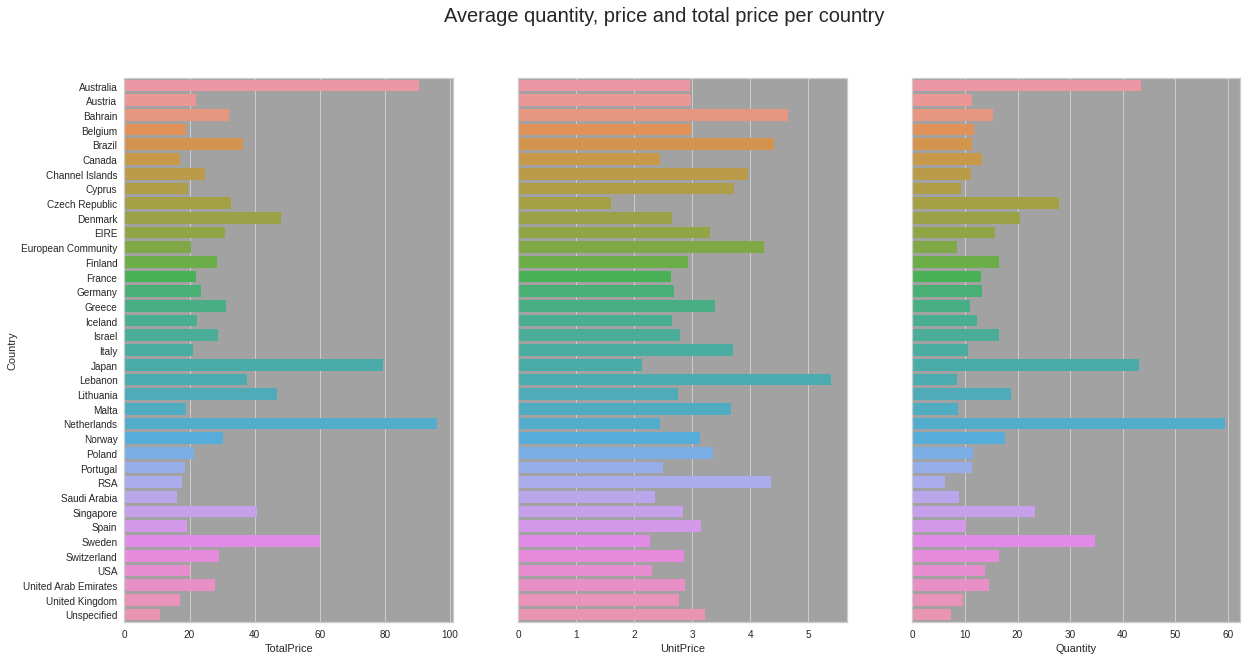

In [ ]:
fig = plt.figure(figsize = (20,10))
fig.suptitle("Average quantity, price and total price per country",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.barplot(data=average_cart_countries,x="TotalPrice",y="Country")

axes = fig.add_subplot(1, 3, 2)
sns.barplot(data=average_price_countries,x="UnitPrice",y="Country")
fig.axes[1].get_yaxis().set_visible(False)

axes = fig.add_subplot(1, 3, 3)
sns.barplot(data=average_quantity_countries,x="Quantity",y="Country")
fig.axes[2].get_yaxis().set_visible(False)

From the below figure it can be concluded that the large total cost in the cart for countries like Australia or Japan can be attributed to the following reasons: 


1.   Due to the tendency of the people of these countries to spend more money on the products (either as gifts or for personal use) caused the average price of the cart to be more significantly more than that of other countries
2.   The company will have to spend additionally to export products to these countries also the lack of proper ground infrastructure, labour and supply chains which will cause the price of the products in these countries to increase. Hence forcing the customers to pay more for the products.

In [ ]:
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = average_cart_countries["Country"],
                  locationmode = "country names",
                  z = average_cart_countries["TotalPrice"].astype(float).round(0).tolist(),
                  hovertext = average_cart_countries["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Total Price", },
                ) 

layout = dict(
              title = "Average Total Price Per Cart By Country",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}  
             )

fig = go.Figure(data=choro_data, layout=layout)
iplot(fig)

>There are four countries that tend to buy have an average cart bigger than the others: the Netherlands, Australia, Japan and Sweden. Based on the plots for quantity and total prices, it seems that those countries have a bigger carts because of quantities, a customer from those countries will buy more quantities than in others.
>
> Hong Kong and Singapore customers tend to be more attracted by expensive items.

---
### What are the best selling products?

We can also exhibit what items are the best for each countries.

In [ ]:
sum_total_price_products = pd.DataFrame(df.groupby(["Country","Description"])["TotalPrice"].sum())
best_selling_product = pd.DataFrame(data=sum_total_price_products.groupby(["Country"])['TotalPrice'].idxmax().values.tolist(),columns =['Country', 'Best Selling Product'])

max_sales = sum_total_price_products.groupby("Country")["TotalPrice"].max().values.tolist()
best_selling_product["Sales"] = max_sales

total_sales = sum_total_price_products.groupby("Country")["TotalPrice"].sum().values.tolist() 
best_selling_product["Country total sales"] = total_sales

best_selling_product["% of country sales"] = best_selling_product["Sales"]/best_selling_product["Country total sales"]

From the below table we can find out the most popular product in each country.

Based on the poplarity of these products number of occurences of each of these we can determine which products generate the largest revenue which can help the company in determinig which products are most popular and whose availible stock needs to be increased.

In [ ]:
best_selling_product \
.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), \
 subset=["% of country sales"]) \
.format({"% of country sales":"{:.2%}",
         "Sales":"£{:,.0f}",
         "Country total sales":"£{:,.0f}"})

,Country,Best Selling Product,Sales,Country total sales,% of country sales
0,Australia,regency cakestand 3 tier,"£1,978","£93,957",2.11%
1,Austria,pack of 6 pannetone gift boxes,£302,"£8,338",3.63%
2,Bahrain,ice cream sundae lip gloss,£120,£548,21.88%
3,Belgium,round snack boxes set of4 woodland,"£1,181","£36,425",3.24%
4,Brazil,regency cakestand 3 tier,£175,"£1,126",15.56%
5,Canada,lunch bag black skull.,£82,"£2,518",3.28%
6,Channel Islands,regency cakestand 3 tier,£518,"£18,251",2.84%
7,Cyprus,edwardian parasol natural,£393,"£11,536",3.40%
8,Czech Republic,round snack boxes set of4 woodland,£71,£787,9.00%
9,Denmark,red kitchen scales,£734,"£17,506",4.20%


In [ ]:
df.Description.value_counts()[:10]

white hanging heart t-light holder    1991
regency cakestand 3 tier              1698
jumbo bag red retrospot               1559
party bunting                         1377
assorted colour bird ornament         1342
lunch bag red retrospot               1299
set of 3 cake tins pantry design      1148
lunch bag  black skull.               1077
pack of 72 retrospot cake cases       1029
spotty bunting                        1007
Name: Description, dtype: int64


# Take Away Points 
From the EDA it can be concluded that: 
1.   Some countries tend to have bigger average prices in carts like  Australia, Japan, Sweden and the Netherlands (which can either be due to people's choices or due to products themselves becoming more expensive).
2.   There are differencies in the best-selling items based on the country. The best-selling item overall is the white hanging heart t-light holder which is not the case when checked seperately for each country.
3.   Apparently the most active moment of the day is around noon, most of the customers purchase items during this time of the day.
4.   Cutomers tend to buy items well in advance before christmas probably fearing an absence of stock during the days chritmas comes near. 

[take me to the top](#section-top)

<a id="section-two"></a>

# 2) Cohort Analysis

A cohort simply means that a group of people they have same characteristics.

Generally, we have three type of cohort analysis:

   - **Time cohorts** or **Acquisition cohorts**: Groups are divided by first activity.
   - **Behavior cohorts** or **Segment-Based cohorts**: Groups are divided by their behaivors and actions about your service.
   - **Size cohorts**: Size-based cohorts refer to the various sizes of customers who purchase a company’s products or services.


Cohort analysis is a subset of behavioral analytics that takes the data from a given eCommerce platform, web application, or online game and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span.

Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

Cohort analysis proves to be valuable because it helps to separate growth metrics from engagement metrics as growth can easily mask engagement problems. In reality, the lack of activity of the old users is being hidden by the impressive growth numbers of new users, which results in concealing the lack of engagement from a small number of people.

Cohort analysis is a better way of looking at data. Its application is not limited to a single industry or function. For example, eCommerce companies can use cohort analysis to spot products that have more potential for sales growth. In digital marketing, it can help identify web pages that perform well based on time spent on websites, conversions or sign-ups. In product marketing, this analysis can be used to identify the success of feature adoption rate and also to reduce churn rates.

In [ ]:
print("Min date: {} \nMax date: {}".format(df.InvoiceDate.min(), df.InvoiceDate.max()))
print("Time difference is: {}".format(df.InvoiceDate.max() - df.InvoiceDate.min()))

Min date: 2010-12-01 08:26:00 
Max date: 2011-12-09 12:50:00
Time difference is: 373 days 04:24:00


Our dataset contains invoice records for more than one year. Let's apply cohort analysis. We can create monthly cohorts.

We will group customers for first invoice record. Cohort index will be number of months since first transaction.

In [ ]:
def get_month(x): return dt.datetime(x.year, x.month, 1) 

def get_dates(df, col):
    
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    
    return year, month, day

In [ ]:
df["InvoiceMonth"] = df["InvoiceDate"].apply(get_month)

df["CohortMonth"] = df.groupby("CustomerID")["InvoiceMonth"].transform("min")

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

  InvoiceMonth CohortMonth  
0   2010-12-01  2010-12-01  
1   2010-12-01  2010-12-01  
2   2010-12-01  2010-12

In [ ]:
invoice_year, invoice_month, invoice_day = get_dates(df, "InvoiceMonth")
cohort_year, cohort_month, cohort_day = get_dates(df, "CohortMonth")

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df["CohortIndex"] = 12 * year_diff + month_diff + 1

In [ ]:
cohort_data = df.groupby(["CohortIndex", "CohortMonth"])["CustomerID"].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index = "CohortMonth", columns = "CohortIndex", values = "CustomerID")

cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,873.0,319.0,279.0,329.0,317.0,350.0,316.0,302.0,304.0,345.0,327.0,439.0,230.0
2011-01-01,409.0,91.0,112.0,94.0,131.0,119.0,103.0,100.0,123.0,135.0,151.0,48.0,NaN
2011-02-01,376.0,68.0,69.0,103.0,100.0,91.0,94.0,100.0,92.0,116.0,26.0,NaN,NaN
2011-03-01,450.0,66.0,111.0,90.0,101.0,75.0,119.0,104.0,124.0,38.0,NaN,NaN,NaN
2011-04-01,297.0,64.0,61.0,61.0,56.0,68.0,65.0,77.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,280.0,55.0,48.0,49.0,59.0,65.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,240.0,42.0,38.0,64.0,54.0,78.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,189.0,34.0,39.0,42.0,50.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,170.0,32.0,41.0,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above data is our cohort table. Its interpretation is simple. For example, We have 873 unique customer with their first transaction is in 2010-12. Its cohort month is 2010-12 and cohort index is 1. Go on the one right cell, it is 319.
It means, 319 unique customer retain their customership for next month.

[take me to the top](#section-top)

<a id="section-two-one"></a>

# 2.1) Retention Rate


Retention tables show a group of people that visited your site or used your app for the first time during a certain time frame. They also display the progressive ‘drop-off’ or decline in activity over time for that particular group (a cohort).

Retention rate is an important metric that calculates the percentage of users who continue using your product or service over a given time period. A high retention rate means your current customers value your product and are providing a sustainable source of revenue. A low retention rate means you have a leaky bucket.

Some attrition is inevitable. Existing customers stop using your product for reasons beyond your control. However, calculating your product’s retention rate is the first step toward turning saveable churn-destined customers into delighted brand enthusiasts.

Marketers can use Retention tables to analyze the quality of users brought by a marketing campaign and compare it to other sources of traffic.


In [ ]:
cohort_sizes = cohort_pivot.iloc[:, 0]

retention = cohort_pivot.divide(cohort_sizes, axis = 0)
retention.index = retention.index.strftime("%Y-%m")

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.365407,0.319588,0.376861,0.363116,0.400916,0.361970,0.345934,0.348225,0.395189,0.374570,0.502864,0.263459
2011-01,1.0,0.222494,0.273839,0.229829,0.320293,0.290954,0.251834,0.244499,0.300733,0.330073,0.369193,0.117359,NaN
2011-02,1.0,0.180851,0.183511,0.273936,0.265957,0.242021,0.250000,0.265957,0.244681,0.308511,0.069149,NaN,NaN
2011-03,1.0,0.146667,0.246667,0.200000,0.224444,0.166667,0.264444,0.231111,0.275556,0.084444,NaN,NaN,NaN
2011-04,1.0,0.215488,0.205387,0.205387,0.188552,0.228956,0.218855,0.259259,0.074074,NaN,NaN,NaN,NaN
2011-05,1.0,0.196429,0.171429,0.175000,0.210714,0.232143,0.267857,0.092857,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.175000,0.158333,0.266667,0.225000,0.325000,0.095833,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.179894,0.206349,0.222222,0.264550,0.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.188235,0.241176,0.241176,0.129412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


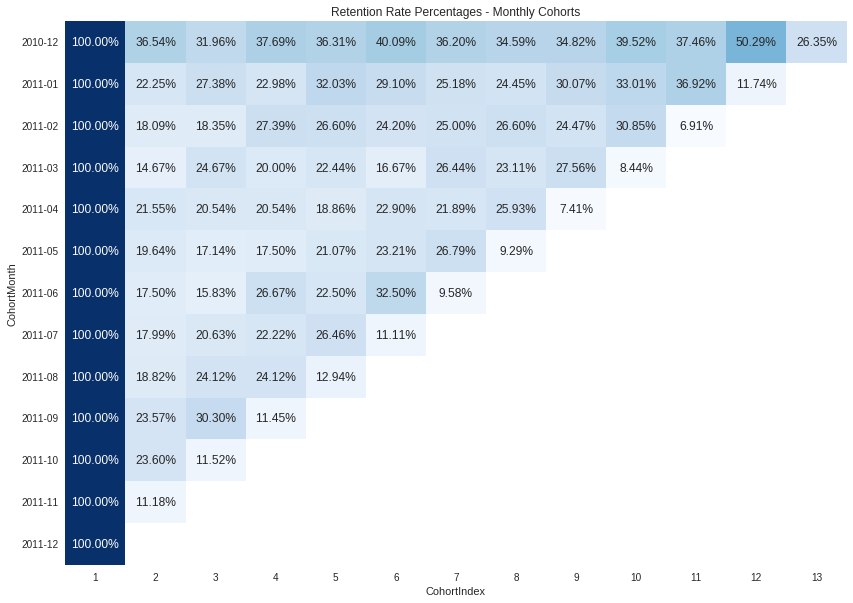

In [ ]:
plt.rcParams["axes.facecolor"] = "white"
fig, ax = plt.subplots(figsize = (14, 10))

sns.heatmap(retention, cmap = "Blues", annot = True, fmt = ".2%", annot_kws = {"fontsize": 12}, cbar = False, ax = ax)

plt.title("Retention Rate Percentages - Monthly Cohorts")
plt.yticks(rotation = 0)
plt.show()

Let's look at above retention rate chart and interpret it.

40.05% of customers that made their first shopping in January 2011, use this company after five months.

In [ ]:
customer_per_month = df.groupby("CohortMonth")["CustomerID"].nunique().values
customers = customer_per_month.cumsum()
customers = customers[::-1]
customers

array([4298, 4259, 3937, 3581, 3284, 3114, 2925, 2685, 2405, 2108, 1658,
       1282,  873])

In [ ]:
customer_in_month = df.groupby("CohortIndex")["CustomerID"].nunique()
customer_in_month

CohortIndex
1     4298
2      961
3      929
4      907
5      890
6      867
7      795
8      709
9      665
10     634
11     504
12     487
13     230
Name: CustomerID, dtype: int64

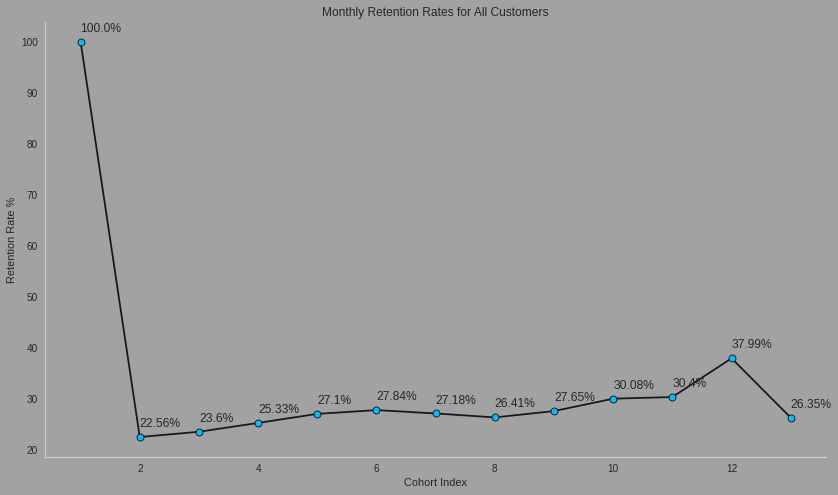

In [ ]:
plt.rcParams["axes.facecolor"] = "#A2A2A2"
fig, ax = plt.subplots(figsize = (14, 8), facecolor = "#A2A2A2")
ax.grid(False)
x = customer_in_month.index
y = 100*(customer_in_month / customers)

sns.lineplot(x = x, y = y,  color = "#101820", marker = "o", markerfacecolor = "#0EB8F1", markeredgecolor = "#000000")

for x, y in zip(x, y):
    plt.text(x, y + 2, s = str(round(y, 2)) + "%")

plt.xlabel("Cohort Index")
plt.ylabel("Retention Rate %")
plt.title("Monthly Retention Rates for All Customers")
sns.despine()
plt.show()


**Retention rate increases significantly for last months of the year.**

Probably, Thanksgiving, Black Friday and Christmas causes it. There are lots of special day at the end of year.

In [ ]:
monthly_customer_price_df = df.groupby("InvoiceMonth").agg({"TotalPrice": "sum",
                                                            "CustomerID": "nunique"})

monthly_customer_price_df

,TotalPrice,CustomerID
InvoiceMonth,,
2010-12-01,473645.26,873
2011-01-01,400112.60,728
2011-02-01,383198.44,746
2011-03-01,499302.63,959
2011-04-01,388020.99,843
2011-05-01,576374.11,1039
2011-06-01,500090.52,981
2011-07-01,492216.34,937
2011-08-01,509963.97,920


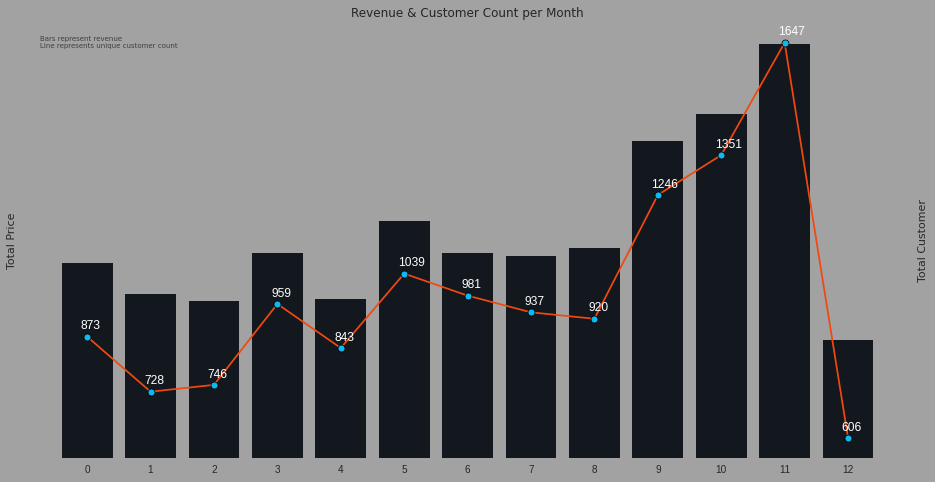

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8), facecolor = "#A2A2A2")
ax.set_facecolor("#A2A2A2")

sns.barplot(x = np.arange(len(monthly_customer_price_df.index)), y = monthly_customer_price_df.TotalPrice, ax = ax,
            color = "#101820")
ax2 = ax.twinx()
sns.lineplot(x = np.arange(len(monthly_customer_price_df.index)), y = monthly_customer_price_df.CustomerID, ax = ax2,
            color = "#F1480F", marker = "o", markerfacecolor = "#0EB8F1", markeredgecolor = "#000000")

ax.set_yticks([])
ax2.set_yticks([])
ax2.set_ylabel("Total Customer", fontname = "Times New Roman")
ax.set_ylabel("Total Price", fontname = "Times New Roman")
plt.title("Revenue & Customer Count per Month", fontname = "Times New Roman")
ax.text(-0.75, 1000000, "Bars represent revenue \nLine represents unique customer count", 
        fontsize = 7, alpha = 0.8, fontname = "Times New Roman")
for x, y in zip(np.arange(len(monthly_customer_price_df.index)),  monthly_customer_price_df.CustomerID):
    ax2.text(x -0.1, y + 20 , y, color = "white")
    
sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

[take me to the top](#section-top)

<a id="section-three"></a>

# 3) Pareto Principle

The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of causes (the “vital few”).

Other names for this principle are the 80/20 rule, the law of the vital few, or the principle of factor sparsity.

![](https://upload.wikimedia.org/wikipedia/commons/e/eb/Pareto_principle.png)

**Lets implement Pareto's 80-20 rule to our dataset**. We have two hypothesis:

    1) 80% of company's revenue comes from 20% of total customers.

    2) 80% of company's revenue comes from 20% of total products.

**Sample Pareto Chart**

![](https://www.cec.health.nsw.gov.au/__data/assets/image/0005/341285/Pareto-1.png)



**To check these hypothesis, we need only two things.** 

1) Individual sale records for customer/product

2) Calculating cumulative sum for them

I define below functions for calculation and visualization.

**prepare_pareto_data** finds individual revenue per customer/product and calculates cumulative percentage of them.

**create_pareto_plot** takes output from these data and visualize it.

In [ ]:
def prepare_pareto_data(df, col, price):
    
    df_price = pd.DataFrame(df.groupby(col)[price].sum())
    df_price = df_price.sort_values(price, ascending = False)

    df_price["CumulativePercentage"] = (df_price[price].cumsum() / df_price[price].sum() * 100).round(2)
    
    return df_price

In [ ]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#A2A2A2"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#A2A2A2")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Revenue", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "Customers" if col == "CustomerID" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

[take me to the top](#section-top)

<a id="section-three-one"></a>

# 3.1) Pareto Chart for Customers

In [ ]:
customer_price = prepare_pareto_data(df, "CustomerID", "TotalPrice")

customer_price.head(10)

,TotalPrice,CumulativePercentage
CustomerID,,
14646.0,189796.00,2.66
14911.0,129413.79,4.48
12415.0,81455.09,5.62
14156.0,80999.72,6.76
18102.0,80619.70,7.89
17511.0,78595.72,8.99
15311.0,56626.81,9.79
13089.0,56555.07,10.58
14096.0,52122.73,11.31


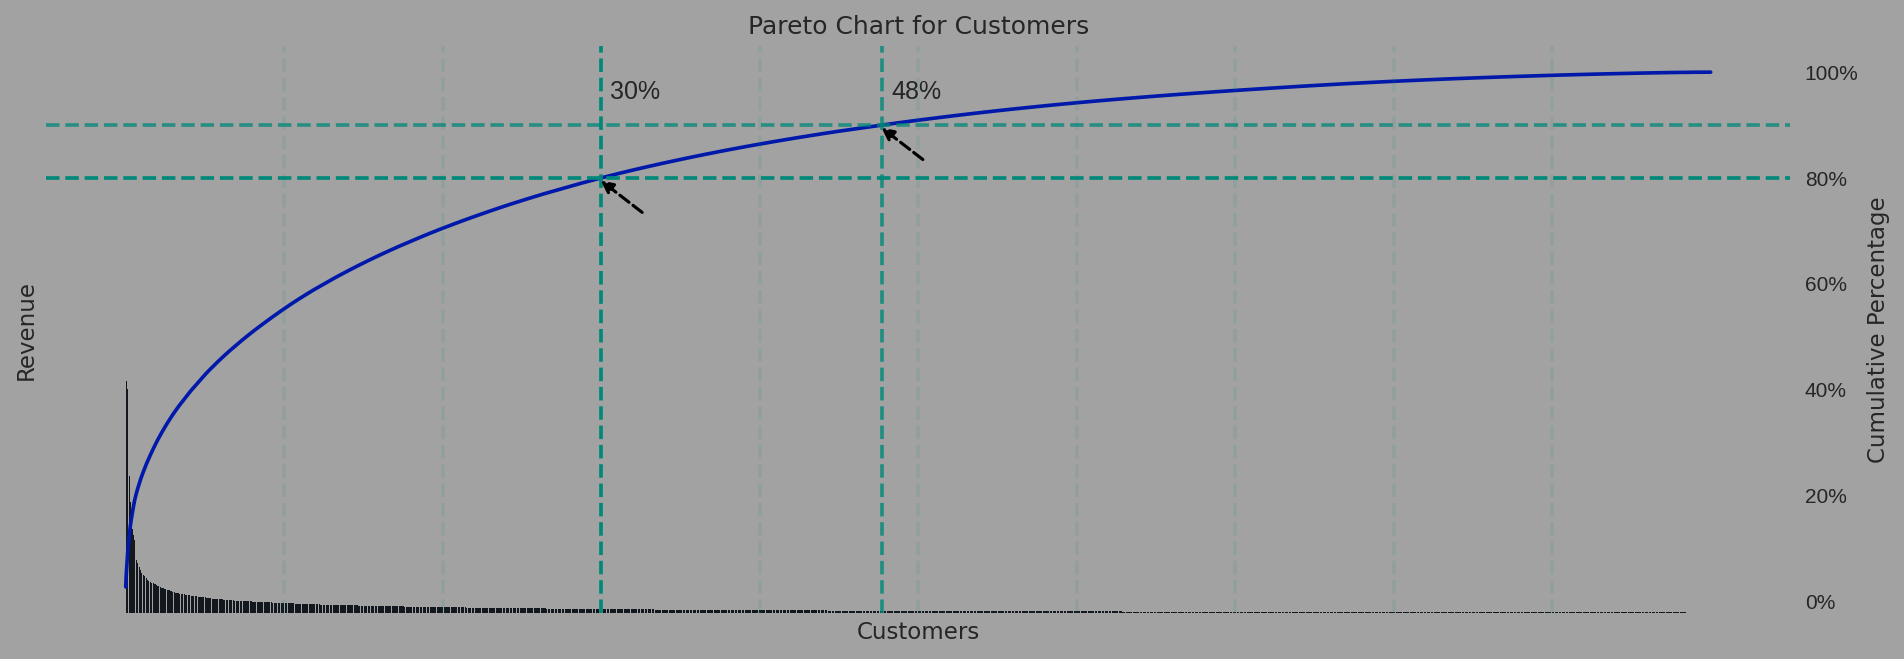

In [ ]:
create_pareto_plot(customer_price, "CustomerID", "TotalPrice", log = False)

We can also plot it in log scale. It helps us for better visualization.

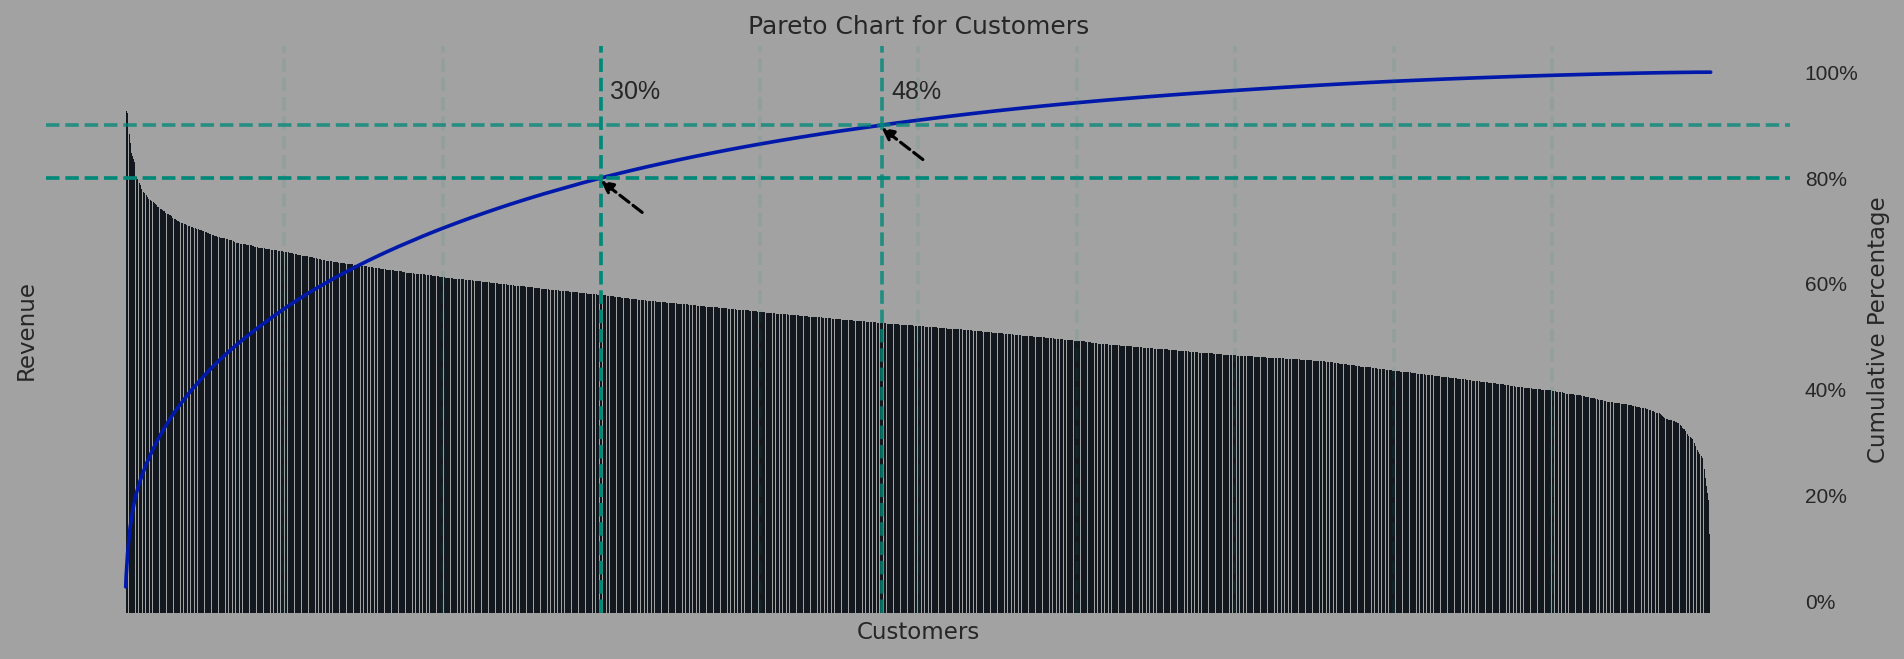

In [ ]:
create_pareto_plot(customer_price, "CustomerID", "TotalPrice", log = True)

Well, lets interpret these two charts.

We can see that 80% of company's revenue comes from top 30% of customers.

Also, 90% of company's revenue comes from top 48% of customers.

[take me to the top](#section-top)

<a id="section-three-two"></a>

# 3.2) Pareto Chart for Products

In [ ]:
item_price = prepare_pareto_data(df, "StockCode", "TotalPrice")

item_price.head(10)

,TotalPrice,CumulativePercentage
StockCode,,
22423,131772.55,1.85
85123A,68226.73,2.81
47566,61107.73,3.66
85099B,57201.84,4.47
79321,37442.87,4.99
84879,37261.43,5.51
22086,35260.53,6.01
23298,31180.85,6.45
22960,29992.02,6.87


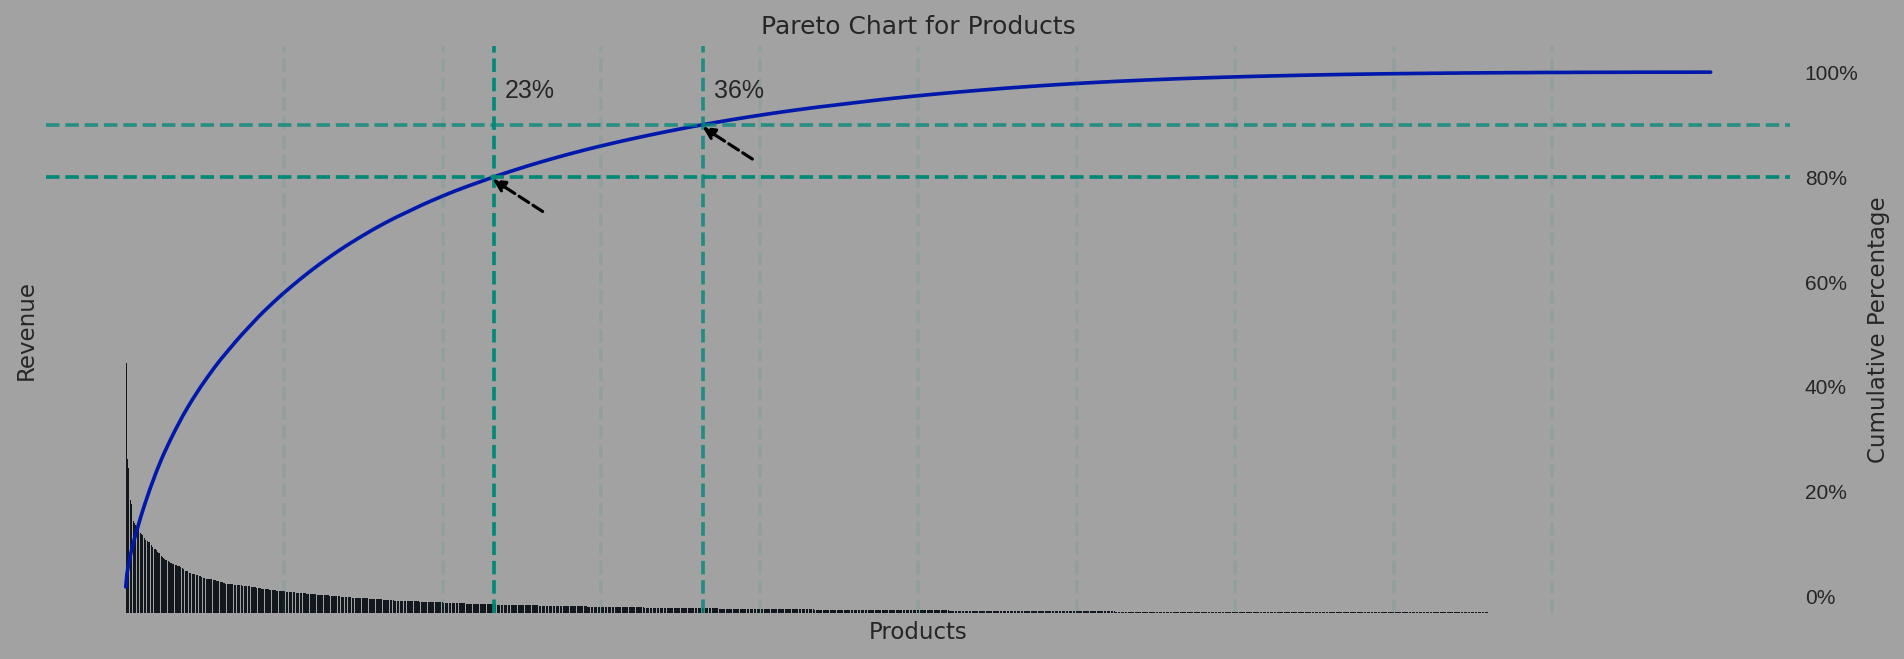

In [ ]:
create_pareto_plot(item_price, "StockCode", "TotalPrice", log = False)

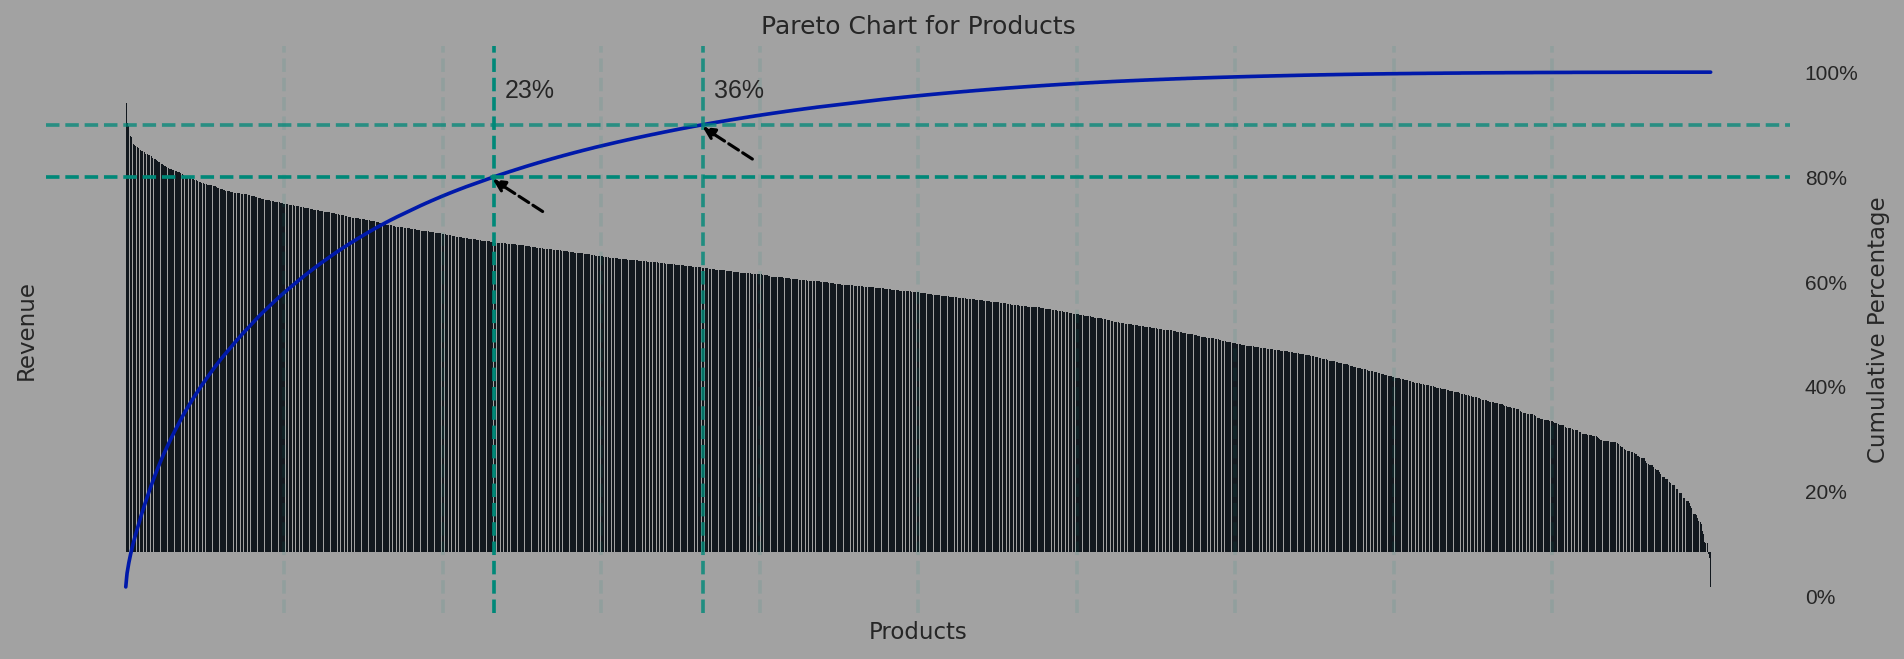

In [ ]:
create_pareto_plot(item_price, "StockCode", "TotalPrice")

We can see that 80% of company's revenue comes from top 23% of products that have most revenue.

Also, 90% of company's revenue comes from 36% of products that have most revenue.

Maybe, if the company reduce by half its variety of items, revenue couldn't decrease significantly.

[take me to the top](#section-top)

# 4) Customer Lifetime Value

In marketing, customer lifetime value (CLV or often CLTV), lifetime customer value (LCV), or life-time value (LTV) is a prognostication of the net profit contributed to the whole future relationship with a customer. The prediction model can have varying levels of sophistication and accuracy, ranging from a crude heuristic to the use of complex predictive analytics techniques.

Customer lifetime value can also be defined as the monetary value of a customer relationship, based on the present value of the projected future cash flows from the customer relationship.
CLTV helps you to design an effective business plan and also provide a chance to scale your business.
Customer lifetime value (CLV) is a measure of the total income a business can expect to bring in from a typical customer for as long as that person or account remains a client.

Customer lifetime value (CLV) is a measure of the average customer’s revenue generated over their entire relationship with a company.
Comparing CLV to customer acquisition cost is a quick method of estimating a customer’s profitability and the business’s potential for long-term growth.
Businesses have several marketing tools to help them improve CLV over time.
Looking at CLV by customer segment may offer expanded insights into what’s working well and what isn’t working as well for your organization.

Customer lifetime value boils down to a single number, but there may be significant nuances. By understanding the different parts of your CLV, you can test different strategies to find out what works best with your customers.

In [ ]:
data_f = df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
data_f.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39


In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387263 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   387263 non-null  float64       
 1   InvoiceDate  387263 non-null  datetime64[ns]
 2   InvoiceNo    387263 non-null  object        
 3   Quantity     387263 non-null  int64         
 4   UnitPrice    387263 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 25.8+ MB


**To determine the monetary values of transactions — and later also the lifetime values of all customers,we insert a new column “totalpurchase” by multiplying the quantities with their corresponding unit prices.**

In [ ]:
data_f = data_f[pd.notnull(data_f['CustomerID'])]
data_f['InvoiceDate'] = pd.to_datetime(data_f['InvoiceDate'])

data_f['TotalPurchase'] = data_f['Quantity']*data_f['UnitPrice']
print(data_f.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387263 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CustomerID     387263 non-null  float64       
 1   InvoiceDate    387263 non-null  datetime64[ns]
 2   InvoiceNo      387263 non-null  object        
 3   Quantity       387263 non-null  int64         
 4   UnitPrice      387263 non-null  float64       
 5   TotalPurchase  387263 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 20.7+ MB
None


Here, we are performing following operations:

**Calculating the number of days between the present date and the date of last purchase from each customer.**

**Calculating the number of orders for each customer.**

**Calculating sum of purchase price for each customer.**

In [ ]:
data_group = data_f.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (x.max()-x.min()).days,
                                               'InvoiceNo' : 'count',
                                               'Quantity' : 'sum',
                                               'TotalPurchase' : 'sum'}).rename(columns = {'InvoiceDate' : 'Recency',
                                                                                           'InvoiceNo' : 'Frequency',
                                                                                           'Quantity' : 'Total Items',
                                                                                           'TotalPurchase' : 'Monetary'}).reset_index().set_index('CustomerID')

Calculating Purchase Frequency, Repeat Rate, Churn Rate and Profit Margin.

**Purchase Frequency(PF):** Purchase Frequency is the ratio of the total number of orders and the total number of customer. 
It represents the average number of orders placed by each customer.

**Repeat Rate:**  Repeat rate can be defined as the ratio of the number of customers with more than one order to the number of unique customers.

**Churn Rate:** Churn Rate is the percentage of customers who have not ordered again.

**Profit Margin:** Profit margin is the profit the retail store has acquired from the customer. 

In [ ]:
data_group['AOV'] = data_group['Monetary']/data_group['Frequency']

#Purchase Frequency
purchase_frequency = sum(data_group['Frequency'])/len(data_group)

# Repeat Rate
repeat_rate = data_group[data_group['Frequency'] > 1].shape[0]/len(data_group)

# Churn Rate:
churn_rate = 1 - repeat_rate

#Profit Margin
data_group['profit_margin'] = data_group['Monetary']*0.05 #5% Profit Margin

Finally Generate CLV using above measurements

In [ ]:
data_group['CLV'] = ((data_group['AOV']*purchase_frequency)/churn_rate)*data_group['profit_margin']
data_group.head(10)

,Recency,Frequency,Total Items,Monetary,AOV,profit_margin,CLV
CustomerID,,,,,,,
12347.0,365,181,2218,4060.40,22.433149,203.0200,2.713449e+07
12348.0,282,27,2332,1437.24,53.231111,71.8620,2.279069e+07
12349.0,0,71,629,1417.60,19.966197,70.8800,8.431633e+06
12350.0,0,16,196,294.40,18.400000,14.7200,1.613683e+06
12352.0,260,77,526,1385.74,17.996623,69.2870,7.429087e+06
12353.0,0,4,20,89.00,22.250000,4.4500,5.899058e+05
12354.0,0,58,530,1079.40,18.610345,53.9700,5.984109e+06
12355.0,0,13,240,459.40,35.338462,22.9700,4.836167e+06
12356.0,302,58,1573,2487.43,42.886724,124.3715,3.177872e+07


[take me to the top](#section-top)

# Prediction Model for CLV

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
import xgboost as xgb

Extract month and year from InvoiceDate.

In [ ]:
import datetime as dt
data_f['InvoiceDate'] = pd.to_datetime(data_f['InvoiceDate'])


data_f['year_month'] = data_f['InvoiceDate'].apply(lambda x : dt.datetime(x.year,x.month,1))

pivot = data_f.groupby(['CustomerID','year_month'])['TotalPurchase'].sum().unstack().reset_index().fillna(0)
pivot

year_month,CustomerID,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00
0,12347.0,711.79,475.39,0.00,0.00,386.65,0.00,382.52,0.00,584.91,0.0,1294.32,0.00,224.82
1,12348.0,652.80,187.44,0.00,0.00,327.00,0.00,0.00,0.00,0.00,270.0,0.00,0.00,0.00
2,12349.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1417.60,0.00
3,12350.0,0.00,0.00,294.40,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4,12352.0,0.00,0.00,296.50,345.01,0.00,0.00,0.00,0.00,0.00,512.5,0.00,231.73,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,18280.0,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4294,18281.0,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.0,0.00,0.00,0.00
4295,18282.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.21,0.0,0.00,0.00,77.84
4296,18283.0,0.00,213.75,100.95,0.00,113.65,85.22,296.52,139.89,0.00,130.9,112.99,637.71,208.00


Sum all the months sales.

In [ ]:
pivot['CLV'] = pivot.iloc[:,2:].sum(axis = 1)
pivot.head()

year_month,CustomerID,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,CLV
0,12347.0,711.79,475.39,0.0,0.00,386.65,0.0,382.52,0.0,584.91,0.0,1294.32,0.00,224.82,3348.61
1,12348.0,652.80,187.44,0.0,0.00,327.00,0.0,0.00,0.0,0.00,270.0,0.00,0.00,0.00,784.44
2,12349.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1417.60,0.00,1417.60
3,12350.0,0.00,0.00,294.4,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,294.40
4,12352.0,0.00,0.00,296.5,345.01,0.00,0.0,0.00,0.0,0.00,512.5,0.00,231.73,0.00,1385.74


Split into X and y Variable


In [ ]:
pivot = pivot.set_index('CustomerID')
X = pivot.iloc[:,2:-1]
y = pivot['CLV']

Split training set and test set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 20, test_size = 0.2)

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

In [ ]:
params = {
    'n_estimators' : [1000],
    'max_depth' : [6,7],
    'eta' : [0.01,0.1],
    'subsample' : [1],
    'colsample_bytree' : [1]
}

model = xgb.XGBRegressor()

cv = RepeatedKFold(n_splits = 5, n_repeats = 2, random_state = 20)

clf = GridSearchCV(estimator = model, param_grid = params, n_jobs = -1, cv = cv, verbose = 3, scoring = 'neg_mean_squared_error')
clf.fit(X_train,y_train)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[03:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=20),
             estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'eta': [0.01, 0.1],
                         'max_depth': [6, 7], 'n_estimators': [1000],
                         'subsample': [1]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. 
Higher value or R-squared is considered better because it indicates the larger variance explained by the model

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

print(f'MAE : {round(mean_absolute_error(y_test,y_pred),2)}')
print(f'RMSE : {round(np.sqrt(mean_squared_error(y_test,y_pred)),2)}')
print(f'R-Squared : {round(r2_score(y_test,y_pred),2)}')
print(f'Normalized RMSE : {round(np.sqrt(mean_squared_error(y_test,y_pred))/(y_pred.max()-y_pred.min()),2)}')

MAE : 355.07
RMSE : 2958.36
R-Squared : 0.75
Normalized RMSE : 0.06


In [ ]:
test_data = pd.DataFrame(y_test)
test_data

,CLV
CustomerID,
13947.0,90.60
15900.0,337.28
14525.0,3703.70
15998.0,2216.83
12791.0,0.00
...,...
15773.0,635.68
14218.0,169.48
15398.0,1345.53


In [ ]:
test_data['pred'] = y_pred
test_data.tail()

,CLV,pred
CustomerID,,
15773.0,635.68,1480.101318
14218.0,169.48,174.522537
15398.0,1345.53,1366.163330
12559.0,525.71,89.652824
15346.0,252.42,113.705315


Understanding the financial impact of your marketing efforts will help your company align and ladder up to bigger financial targets in an organization—or start creating them if you’re a smaller operation.

One of the biggest factors in addressing CLV is improving customer retention and avoiding customer attrition. Tracking these details with accurate segmentation can help you identify your best customers and determine what’s working well.

Some retailers, tech companies, restaurant chains and other businesses have loyal customer bases that come back again and again. You can use CLV to track the average number of visits per year or over the customer lifetime and use that data to strategize ways to increase repeat business.

Overall, a higher CLV should lead to bigger profits. By keeping customers longer and building a business that encourages them to spend more, you should see the benefit show up on your bottom line.

Effective management of your customers relationships, which leads to increased profitability—that’s perhaps the most obvious advantage of Customer Lifetime Value.

[take me to the top](#section-top)

<a id="section-four"></a>

# 5) Segmentation of Customers using RFM Analysis

RFM analysis is a **marketing technique** used to quantitatively **rank and group customers** based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

- **Recency**. *How recent* was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

- **Frequency**. *How often* did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

- **Monetary**. *How much money* did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

![](https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png)

In [ ]:
today_date = dt.datetime(2011, 12, 1)

In [ ]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'TotalPrice' : lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [ ]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))
                  

**Champions**: Bought recently, buy often and spend the most

**Loyal customers**: Buy on a regular basis. Responsive to promotions.

**Potential loyalist**: Recent customers with average frequency.

**New customers**: Bought most recently, but not often.

**Promising**: Recent shoppers, but haven’t spent much.

**Needs attention**: Above average recency, frequency and monetary values. May not have bought very recently though.

**About to sleep**: Below average recency and frequency. Will lose them if not reactivated.

**At risk**: Some time since they’ve purchased. Need to bring them back!

**Can’t lose**: Used to purchase frequently but haven’t returned for a long time.

**Hibernating**: Last purchase was long back and low number of orders. May be lost.

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12347.0,-7,7,4060.40,5,5,5,55,champions
1,12348.0,66,4,1437.24,2,4,4,24,at_Risk
2,12349.0,9,1,1417.60,4,1,4,41,promising
3,12350.0,301,1,294.40,1,1,2,11,hibernating
4,12352.0,27,7,1385.74,3,5,4,35,loyal_customers


In [ ]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(15)

,segment,count
0,about_to_sleep,347
1,at_Risk,582
2,cant_loose,61
3,champions,647
4,hibernating,1064
5,loyal_customers,793
6,need_attention,188
7,new_customers,45
8,potential_loyalists,483
9,promising,88


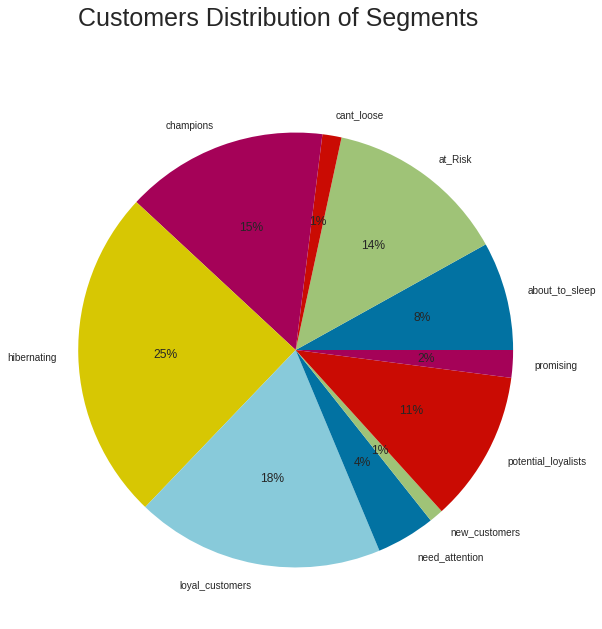

In [ ]:
fig  = plt.figure(figsize = (20,10)).suptitle('Customers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [ ]:
agg_list=["mean", "count", "max"]
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(agg_list)

recency             frequency                monetary  \
                           mean count  max       mean count  max         mean   
segment                                                                         
about_to_sleep        43.409222   347   62   1.138329   347    2   452.154236   
at_Risk              144.058419   582  364   2.852234   582    5   887.676323   
cant_loose           127.245902    61  363   8.327869    61   34  2421.154918   
champions             -3.336940   647    5  11.996909   647  206  5303.569876   
hibernating          207.652256  1064  364   1.093985  1064    2   376.425113   
loyal_customers       24.240858   793   62   6.341740   793   55  2496.314918   
need_attention        42.372340   188   62   2.308511   188    3   815.975319   
new_customers         -1.733333    45    5   1.000000    45    1   274.965556   
potential_loyalists    7.459627   483   23   1.987578   483    3   633.053458   
promising             13.886364    88   23   1.000000    88    1   272.286705   

                                      
                    count        max  
segment                               
about_to_sleep        347    6129.12  
at_Risk               582   11072.67  
cant_loose             61   10254.18  
champions             647  189796.00  
hibernating          1064    8654.26  
loyal_customers       793   81455.09  
need_attention        188    3683.86  
new_customers          45     794.55  
potential_loyalists   483    4628.75  
promising              88    1417.60

> 15% of customers considered as Champions.
> These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping improving their experience. What we can do:
> - Give them something extra that the regulars do not get, for example, **limited series of products** or special **discounts** to make them feel valued. 
> - Use communication similar to the "Loyal" segment. For example **making them ambassadors**, giving them a margin of your profits for bringing you, new customers.
> - Ask them for **feedbacks** as they might know the products and services very well.

[take me to the top](#section-top)

<a id="section-five"></a>

# 6) Clustering - Segmentation of Customers using K-Means Clustering

In [ ]:
df_clustering = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,'InvoiceNo': 'nunique', 'TotalPrice' : 'sum'})

df_clustering.columns = ['recency', 'frequency', 'monetary']

In [ ]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])
df_scaled["CustomerID"] = df_clustering.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

To determine the optimal number of clusters, We will use the elbow method.

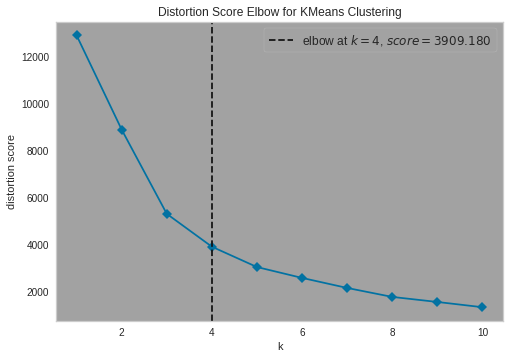

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)        
visualizer.show()        

In [ ]:
#silhoutte score
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(3, kmax+1):
  model1 = KMeans(n_clusters = k).fit(df_scaled)
  labels = model1.labels_
  sil.append(silhouette_score(df_scaled, labels, metric = 'euclidean'))
sil

[0.5780858266566844,
 0.6062028517506671,
 0.5943971681369379,
 0.5037064426750352,
 0.5040679505363618,
 0.48109259553349043,
 0.485534149319777,
 0.4854105977820275]

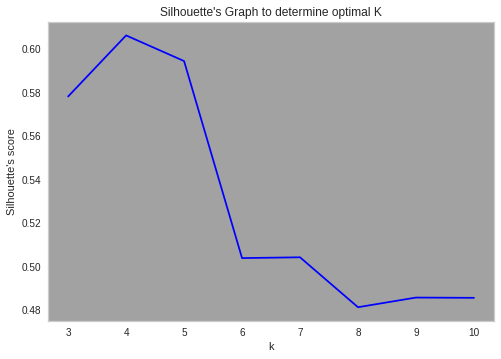

In [ ]:
x_axis = np.arange(3, 11)
y_axis = sil

plt.title("Silhouette's Graph to determine optimal K")
plt.xlabel("k")
plt.ylabel("Silhouette's score")
plt.plot(x_axis, y_axis, color = "blue")
plt.show()

Both Silhoutte's and Elbow Method give the optimal value of k as 4.

Elbow method only takes euclidean distance into account whereas silhouette score takes variance, skewness, high-low differences (multiple criteria) into account. 



In [ ]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,recency,frequency,monetary
0,-0.489166,-0.077226,-0.079933
1,1.550123,-0.353463,-0.227880
2,-0.881281,11.757598,15.157190
3,-0.806184,2.307925,1.558062


In [ ]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [ ]:
df_kmeans = df_clustering.copy()
df_kmeans['labels'] = df_labels['labels'].values

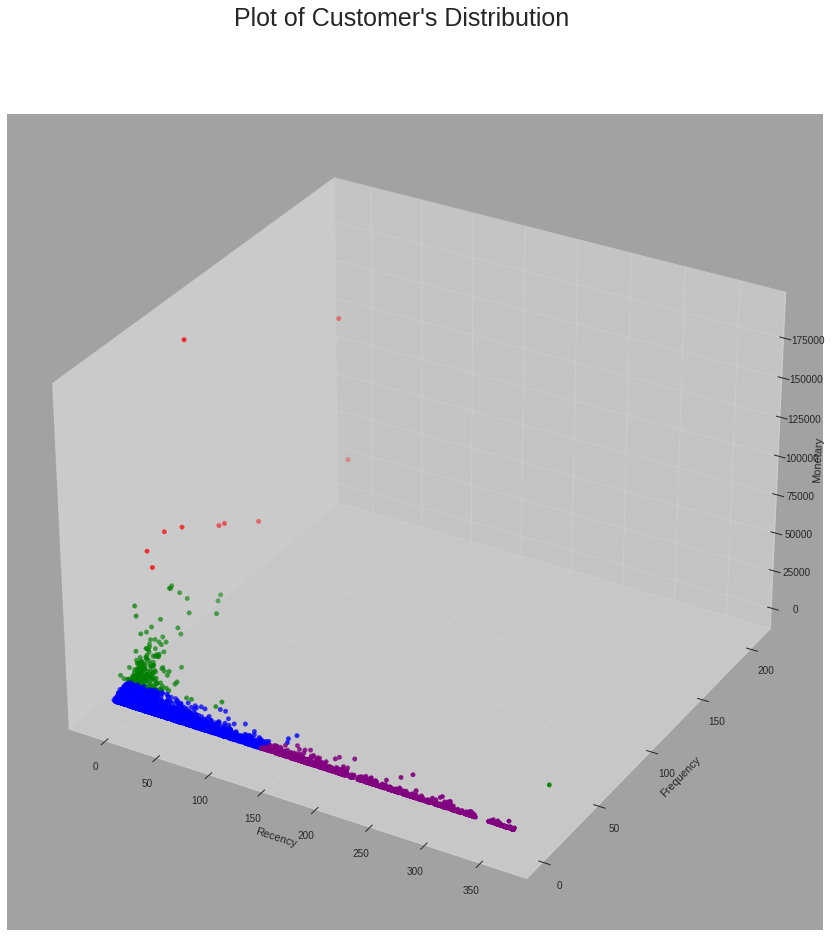

In [ ]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["monetary"], marker='o', c=colors[df_kmeans["labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

In [ ]:
agg_list=["mean", "count", "max",]
df_kmeans[["labels", "recency", "frequency", "monetary"]].groupby("labels").agg(agg_list)

recency             frequency                 monetary        \
              mean count  max       mean count  max          mean count   
labels                                                                    
0        34.222001  3009  154   3.619143  3009   15   1232.921226  3009   
1       238.205441  1066  364   1.546904  1066   12    445.232477  1066   
2        -5.000000    10   15  92.400000    10  206  82357.562000    10   
3         2.511737   213  363  21.511737   213   90   9953.844131   213   

                   
              max  
labels             
0        11072.67  
1         8654.26  
2       189796.00  
3        52122.73

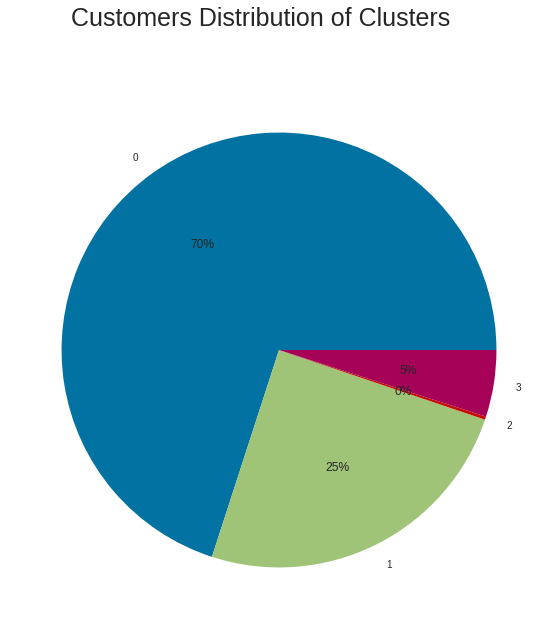

In [ ]:
df_kmeans = df_kmeans.reset_index()
clusters_count = df_kmeans.groupby("labels").agg({"CustomerID": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['cluster', 'count']

fig  = plt.figure(figsize = (20,10)).suptitle('Customers Distribution of Clusters', fontsize=25)
plt.pie(clusters_count["count"], labels = clusters_count["cluster"], autopct='%.0f%%')

plt.show()

> From the KMeans clustering, we can sort every customer into 4 different clusters that seems to have different behaviours.
> - **Cluster 0**: "Punctual customers" - Those are the customers that buys more punctually items on the website.
> - **Cluster 1**: "Hibernating customers" - Those are the customers that buys at the lowest frequency, the lowest recently and that spend the least money.
> - **Cluster 2**: "Exceptional customers" - Those are the customers that we want to keep, that buys at the highest frequency, the most recently and that spend the most money. 
> - **Cluster 3**: " Recent customers" - Those are customers that have been active quite recently that might be interesting to keep stimulated.

---

> ** Segmentation**: 
> - *RFM*: Separated all the customers into 10 informative categories based on their recency, frequency and monetary. 
> - *KMeans*: Separated the customers into 4 groups that have similarities based on their recency, frequency and monetary. This time the categories are more flexible and not based on a grade.
>
> From the two segmentations we learnt that there are *a few exceptional customers* that we would want to keep offering them *discounts*, or an *ambassador title*. There is also a quarter of the customers that are *not really active* and don't spend a lot. 

[take me to the top](#section-top)

#**7)Apriori Algorithm**
Apriori algorithm uses frequently bought item-sets to generate association rules. It is built on the idea that the subset of a frequently bought items-set is also a frequently bought item-set. Frequently bought item-sets are decided if their support value is above a minimum threshold support value.

#**Association Rules**
**Support**

It tells us about the combination of items bought together frequently. It gives the part of transactions that contain both items (say A and B)

support = occurance of item / total no of transaction.

**Confidence**

It tells us how likely B will be purchased provided A is purchased, for the no. of times A is bought.

confidence = support ( X Union Y) / support(X).

**Lift**

It indicates the strength of a rule over the randomness of A and B being bought together. It basically measures the strength of any association rule

lift = support (X Union Y)/ support(X) * support(Y) .

In [ ]:
country_list = []
country_list = df['Country'].unique()
print(country_list)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Finland' 'Austria' 'Sweden' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [ ]:
baskets = df[df['Country'] == 'United Kingdom']\
.groupby(['InvoiceNo','Description'])['Quantity']\
.sum()\
.unstack()\
.reset_index()\
.fillna(0)\
.set_index('InvoiceNo')

print(baskets)

Description   4 purple flock dinner candles   50's christmas gift bag large  \
InvoiceNo                                                                     
536365                                  0.0                             0.0   
536366                                  0.0                             0.0   
536367                                  0.0                             0.0   
536368                                  0.0                             0.0   
536369                                  0.0                             0.0   
...                                     ...                             ...   
581582                                  0.0                             0.0   
581583                                  0.0                             0.0   
581584                                  0.0                             0.0   
581585                                  0.0                             0.0   
581586                                  0.0         

**We need to make sure that any positive values are encoded to one and all the negative values(if any) to zero.**

In [ ]:
def encode_units(x):
    if x<=0:
        return 0
    else:
        return 1
basket_sets = baskets.applymap(encode_units)
basket_sets

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,toadstool bedside light,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**we can apply Apriori algorithm to get the frequently bought item-sets**

**Here the minimum threshold is kept as 1.5%**

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support = 0.015, use_colnames = True)
print(frequent_itemsets)

      support                                           itemsets
0    0.015329                    (12 pencil small tube woodland)
1    0.017483              (12 pencils small tube red retrospot)
2    0.016560                      (12 pencils small tube skull)
3    0.015760               (3 hearts hanging decoration rustic)
4    0.017422                 (3 hook photo shelf antique white)
..        ...                                                ...
453  0.015760  (roses regency teacup and saucer , regency cak...
454  0.015390  (lunch bag pink polkadot, lunch bag cars blue,...
455  0.015206  (lunch bag red retrospot, lunch bag cars blue,...
456  0.018037  (lunch bag pink polkadot, lunch bag red retros...
457  0.015637  (lunch bag pink polkadot, lunch bag red retros...

[458 rows x 2 columns]


**Arrange the itemsets in descending order of their support values which gives us the graph shown below**

Text(0, 0.5, 'Support')

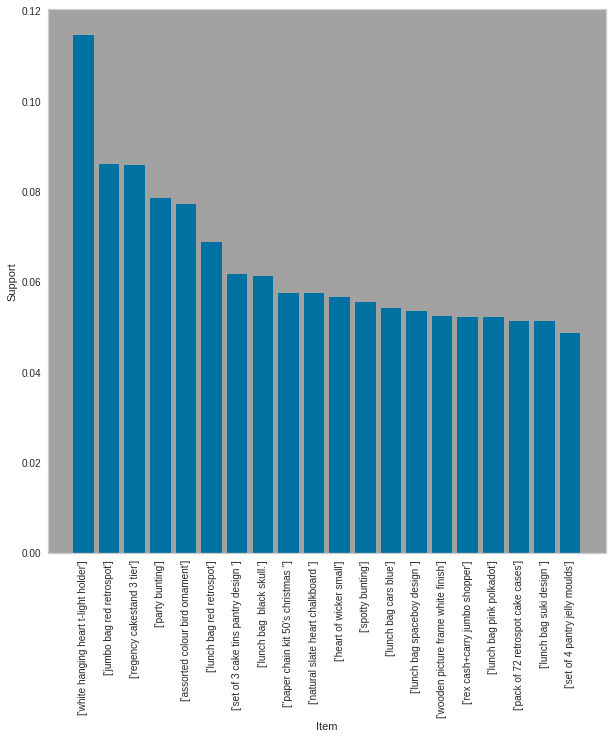

In [ ]:
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

**We then apply the association rules to these item-sets formed by Apriori algorithm.**

**The metric used here is confidence and its minimum threshold value is set to be 0.2.**

In [ ]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.2)
print(rules.shape)
rules

(216, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pack of 60 pink paisley cake cases),(60 teatime fairy cake cases),0.035521,0.035644,0.015206,0.428076,12.009794,0.013940,1.686162
1,(60 teatime fairy cake cases),(pack of 60 pink paisley cake cases),0.035644,0.035521,0.015206,0.426598,12.009794,0.013940,1.682028
2,(pack of 72 retrospot cake cases),(60 teatime fairy cake cases),0.051404,0.035644,0.017422,0.338922,9.508552,0.015590,1.458763
3,(60 teatime fairy cake cases),(pack of 72 retrospot cake cases),0.035644,0.051404,0.017422,0.488774,9.508552,0.015590,1.855531
4,(alarm clock bakelike ivory),(alarm clock bakelike green),0.026040,0.042231,0.015267,0.586288,13.882899,0.014167,2.315065
...,...,...,...,...,...,...,...,...,...
211,"(lunch bag pink polkadot, lunch bag cars blue)",(lunch bag red retrospot),0.024378,0.068887,0.015637,0.641414,9.311109,0.013957,2.596625
212,"(lunch bag red retrospot, lunch bag cars blue)",(lunch bag pink polkadot),0.025425,0.052204,0.015637,0.615012,11.780963,0.014309,2.461885
213,(lunch bag pink polkadot),"(lunch bag red retrospot, lunch bag cars blue)",0.052204,0.025425,0.015637,0.299528,11.780963,0.014309,1.391313
214,(lunch bag red retrospot),"(lunch bag pink polkadot, lunch bag cars blue)",0.068887,0.024378,0.015637,0.226988,9.311109,0.013957,1.262105


**As we can see, all the antecedents with the corresponding consequents are listed with their individual supports, the total support of the item-set and all other metrics.**

**The top rules having the highest confidence include:**

In [ ]:
top_rules = rules.sort_values('confidence', ascending = False)[:10]
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
181,"(roses regency teacup and saucer , pink regenc...",(green regency teacup and saucer),0.023455,0.037614,0.020869,0.889764,23.655193,0.019987,8.730217
183,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer ),0.024809,0.041492,0.020869,0.841191,20.273454,0.019840,6.035604
189,"(regency cakestand 3 tier, green regency teacu...",(roses regency teacup and saucer ),0.019146,0.041492,0.015760,0.823151,19.838675,0.014965,5.419926
36,(pink regency teacup and saucer),(green regency teacup and saucer),0.030288,0.037614,0.024809,0.819106,21.776682,0.023670,5.320157
41,(green regency teacup and saucer),(roses regency teacup and saucer ),0.037614,0.041492,0.029180,0.775777,18.696926,0.027619,4.274805
166,(pink regency teacup and saucer),(roses regency teacup and saucer ),0.030288,0.041492,0.023455,0.774390,18.663494,0.022198,4.248521
180,(wooden star christmas scandinavian),(wooden heart christmas scandinavian),0.024317,0.026471,0.018222,0.749367,28.308649,0.017578,3.884281
187,"(roses regency teacup and saucer , regency cak...",(green regency teacup and saucer),0.021054,0.037614,0.015760,0.748538,19.900575,0.014968,3.827163
32,(gardeners kneeling pad cup of tea ),(gardeners kneeling pad keep calm ),0.038476,0.045617,0.028072,0.729600,15.994092,0.026317,3.529524
14,(baking set spaceboy design),(baking set 9 piece retrospot ),0.022347,0.044386,0.016129,0.721763,16.261192,0.015137,3.434535


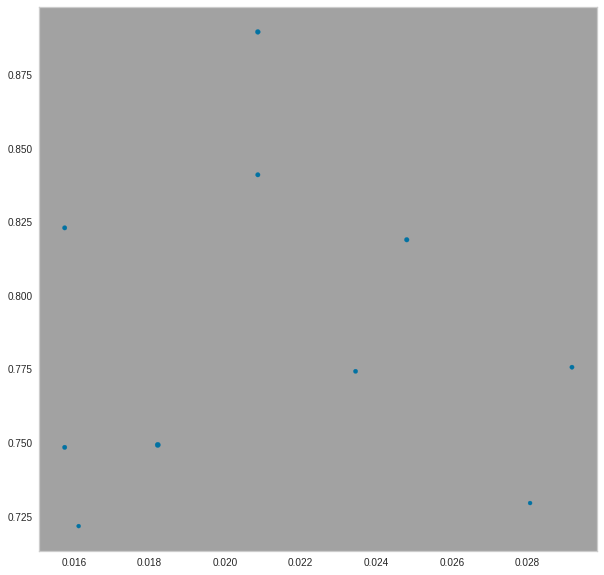

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(top_rules.support, top_rules.confidence, top_rules.lift)

**Now we find the lift and confidence mean and further filter out the item sets**

In [ ]:
confidence_mean = top_rules['confidence'].mean()
lift_mean = top_rules['lift'].mean()
print(confidence_mean, lift_mean)

0.7872647506664593 20.33689325819891


In [ ]:
rules[(rules.lift >= 20.338145221585894) & (rules.confidence >= 0.7872647506664593)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(pink regency teacup and saucer),(green regency teacup and saucer),0.030288,0.037614,0.024809,0.819106,21.776682,0.023670,5.320157
181,"(roses regency teacup and saucer , pink regenc...",(green regency teacup and saucer),0.023455,0.037614,0.020869,0.889764,23.655193,0.019987,8.730217


**In this way all the required item-sets can be found. Further fine-tuning of the item-sets to find the more probable ones can be done by increasing the threshold values of support and lift.**

[take me to the top](#section-top)

<a id="section-five"></a>

# 8) Forecasting with Prophet

**Time series forecasting can be challenging as there are many different methods you could use and many different hyperparameters for each method.**

**The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.** 

In [ ]:
print(df.shape)
df

(387263, 12)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01,5
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01,5
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5


<a id="section-five-one"></a>

# 8.1) Data Preparation for Time Series

We will use only UK sales for this analysis.

In [ ]:
data_uk = df[df.Country == "United Kingdom"]
data_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,fairy tale cottage night light,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-01,2011-05-01,8
541890,581586,22061,large cake stand hanging strawbery,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-01,2010-12-01,13
541891,581586,23275,set of 3 hanging owls ollie beak,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-01,2010-12-01,13
541892,581586,21217,red retrospot round cake tins,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-01,2010-12-01,13


In [ ]:
data_uk.loc[:, "InvoiceDate"] = pd.to_datetime(data_uk.loc[:, "InvoiceDate"])

print(f"First observation on data is {data_uk.InvoiceDate.min()}")
print(f"Last observation on data is {data_uk.InvoiceDate.max()}")

print(f"We have {(data_uk.InvoiceDate.max() - data_uk.InvoiceDate.min()).days} days.")

First observation on data is 2010-12-01 08:26:00
Last observation on data is 2011-12-09 12:49:00
We have 373 days.


We have 373 days sales record. Daily data can be more suitable.

In [ ]:
data_uk.set_index("InvoiceDate", inplace = True)
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,white hanging heart t-light holder,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
2010-12-01 08:26:00,536365,71053,white metal lantern,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2010-12-01 08:26:00,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
2010-12-01 08:26:00,536365,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2010-12-01 08:26:00,536365,84029E,red woolly hottie white heart.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


[take me to the top](#section-top)

<a id="section-five-one-one"></a>

# 8.1.1) Weekly

In [ ]:
prices_df = pd.DataFrame(data_uk.groupby("InvoiceDate").TotalPrice.sum())
prices_df = prices_df.iloc[:-1]
prices_df

,TotalPrice
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 09:00:00,204.00
...,...
2011-12-09 12:20:00,145.29
2011-12-09 12:21:00,29.88
2011-12-09 12:23:00,124.60


In [ ]:
weekly_prices = prices_df.resample("W").sum()
print(weekly_prices)

             TotalPrice
InvoiceDate            
2010-12-05    117026.41
2010-12-12    144301.27
2010-12-19    126984.38
2010-12-26     27514.58
2011-01-02         0.00
2011-01-09     85679.79
2011-01-16     66540.78
2011-01-23     61250.46
2011-01-30     77542.04
2011-02-06     79672.54
2011-02-13     55054.87
2011-02-20     82793.08
2011-02-27     89998.74
2011-03-06     72767.49
2011-03-13     81750.54
2011-03-20     94405.33
2011-03-27     85329.42
2011-04-03     97312.53
2011-04-10     81234.16
2011-04-17    110822.37
2011-04-24     75046.84
2011-05-01     58445.42
2011-05-08     97003.10
2011-05-15    122197.77
2011-05-22    148042.87
2011-05-29     89294.70
2011-06-05     74420.83
2011-06-12     96081.65
2011-06-19     97495.91
2011-06-26     81156.28
2011-07-03     66258.10
2011-07-10     88008.25
2011-07-17     88129.38
2011-07-24    121782.65
2011-07-31     97036.28
2011-08-07    102412.24
2011-08-14     80101.61
2011-08-21     97772.12
2011-08-28    102449.54
2011-09-04     7

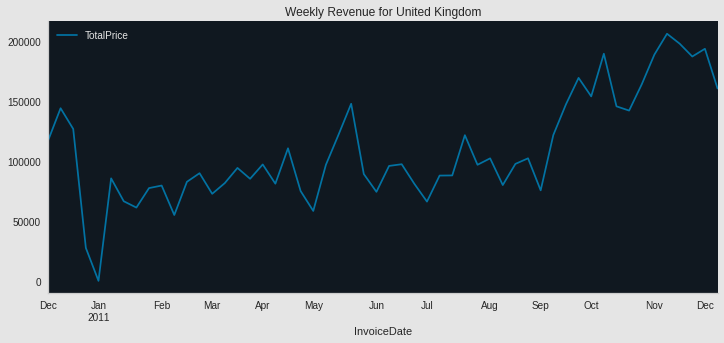

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

weekly_prices.plot(ax = ax).set_title("Weekly Revenue for United Kingdom")
ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")

sns.despine()
plt.show()

Here, we have revenue per week graph. Let's interpret it.

Earlier January, this retailer was closed. Revenue is 0.

We see first peak in the middle of May.

Second peak is in the beginning of October.

Then the revenue top out in the middle of November.

[take me to the top](#section-top)

<a id="section-five-one-two"></a>

# 8.1.2) Daily Data

Convert data to daily form using resample method

In [ ]:
daily_sales = pd.DataFrame(data_uk.groupby("InvoiceDate").sum().resample("D").sum()["TotalPrice"])
print(daily_sales)

             TotalPrice
InvoiceDate            
2010-12-01     34365.95
2010-12-02     40419.52
2010-12-03     17865.61
2010-12-04         0.00
2010-12-05     24375.33
...                 ...
2011-12-05     45414.75
2011-12-06     38263.86
2011-12-07     30978.54
2011-12-08     35690.36
2011-12-09     10825.16

[374 rows x 1 columns]


We saw that there is a zero revenue week from late December in 2010 to earlier January in 2011.

In [ ]:
daily_sales.loc["2010-12-23" : "2011-1-4"]

,TotalPrice
InvoiceDate,
2010-12-23,3959.77
2010-12-24,0.00
2010-12-25,0.00
2010-12-26,0.00
2010-12-27,0.00
2010-12-28,0.00
2010-12-29,0.00
2010-12-30,0.00
2010-12-31,0.00


**Encode all 0 revenue sales to 1 in new column Closed**

In [ ]:
daily_sales.reset_index(inplace = True)
daily_sales["Closed"] = np.where((daily_sales.TotalPrice == 0), 1, 0)
daily_sales.set_index("InvoiceDate", inplace = True)

In [ ]:
daily_sales["weekday"] = daily_sales.index.day_name()
daily_sales

,TotalPrice,Closed,weekday
InvoiceDate,,,
2010-12-01,34365.95,0,Wednesday
2010-12-02,40419.52,0,Thursday
2010-12-03,17865.61,0,Friday
2010-12-04,0.00,1,Saturday
2010-12-05,24375.33,0,Sunday
...,...,...,...
2011-12-05,45414.75,0,Monday
2011-12-06,38263.86,0,Tuesday
2011-12-07,30978.54,0,Wednesday


**Count the number of days that have 0 revenue sales**

In [ ]:
daily_sales[daily_sales.TotalPrice == 0].weekday.value_counts()

Saturday     53
Monday        6
Friday        4
Sunday        3
Tuesday       1
Wednesday     1
Thursday      1
Name: weekday, dtype: int64

We observe that we don't have any record for 69 days. 53 of 69 days is a Saturday. One possible explanation is the retailer could be closed on Saturdays. 

**Let's look at total revenues per weekday.**

In [ ]:
daily_sales.groupby("weekday").TotalPrice.sum()

weekday
Friday        857844.60
Monday        946162.46
Saturday           0.00
Sunday        661535.29
Thursday     1262797.66
Tuesday      1045472.89
Wednesday    1095525.43
Name: TotalPrice, dtype: float64

Yes, from this we can conclude that the retailer is closed on saturdays.

**Consider the rows that have non-zero revenue sales and drop the column weekday**

In [ ]:
daily_sales_workdays = daily_sales[daily_sales.TotalPrice > 0].copy()
daily_sales.drop("weekday", axis = 1, inplace = True)
daily_sales_workdays.drop("weekday", axis = 1, inplace = True)
daily_sales_workdays

,TotalPrice,Closed
InvoiceDate,,
2010-12-01,34365.95,0
2010-12-02,40419.52,0
2010-12-03,17865.61,0
2010-12-05,24375.33,0
2010-12-06,25082.53,0
...,...,...
2011-12-05,45414.75,0
2011-12-06,38263.86,0
2011-12-07,30978.54,0


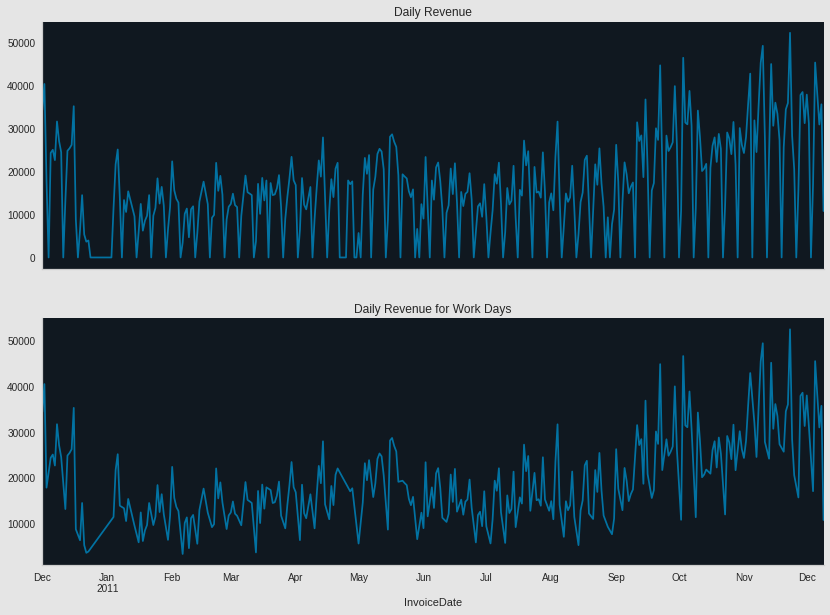

In [ ]:
fig, axes = plt.subplots(2, 1, sharex = True, figsize = (14, 10), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#101820")

daily_sales.TotalPrice.plot(ax = axes[0]).set_title("Daily Revenue") #Entire dataset
daily_sales_workdays.TotalPrice.plot(ax = axes[1]).set_title("Daily Revenue for Work Days") #Considering only non-zero revenue sales

sns.despine()
plt.show()

[take me to the top](#section-top)

As we can see above daily revenue graphs, we have an increasing trend for end of the year.

<a id="section-five-two"></a>

# 8.2) Stationarity

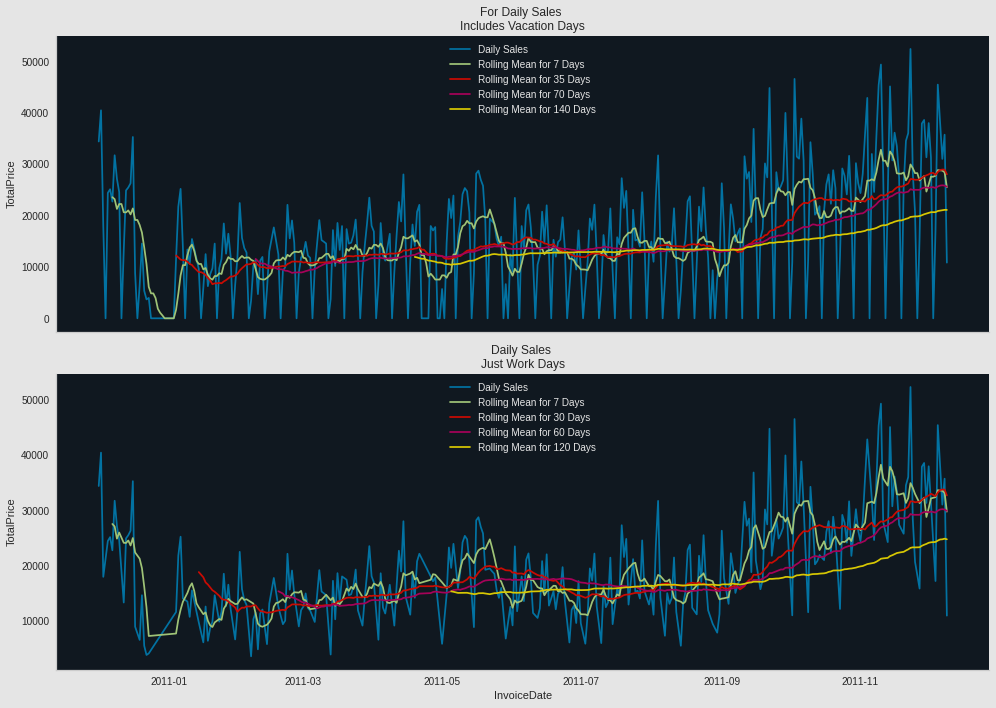

In [ ]:
fig, axes = plt.subplots(2, 1, sharex = True, figsize = (14, 10), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#101820")
    
sns.lineplot(x = daily_sales.index, y = daily_sales.TotalPrice, 
             ax = axes[0], label = "Daily Sales").set_title("For Daily Sales \nIncludes Vacation Days")

sns.lineplot(x = daily_sales.index, y = daily_sales.TotalPrice.rolling(7).mean(), 
             ax = axes[0], label = "Rolling Mean for 7 Days")
sns.lineplot(x = daily_sales.index, y = daily_sales.TotalPrice.rolling(35).mean(), 
             ax = axes[0], label = "Rolling Mean for 35 Days")
sns.lineplot(x = daily_sales.index, y = daily_sales.TotalPrice.rolling(70).mean(), 
             ax = axes[0], label = "Rolling Mean for 70 Days")
sns.lineplot(x = daily_sales.index, y = daily_sales.TotalPrice.rolling(140).mean(), 
             ax = axes[0], label = "Rolling Mean for 140 Days")


sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice, 
             ax = axes[1], label = "Daily Sales").set_title("Daily Sales \nJust Work Days")

sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice.rolling(6).mean(), 
             ax = axes[1], label = "Rolling Mean for 7 Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice.rolling(30).mean(),
             ax = axes[1], label = "Rolling Mean for 30 Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice.rolling(60).mean(), 
             ax = axes[1], label = "Rolling Mean for 60 Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice.rolling(120).mean(), 
             ax = axes[1], label = "Rolling Mean for 120 Days")

for ax in axes: ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")
    
sns.despine()
plt.tight_layout()
plt.show()

Let's check stationarity. Stationarity simply means that, our series has constant mean, variance on different times.

In above rolling mean plots, we saw that our mean values increase over time.

But, let's check it with **Augmented Dickey Fuller test**.

[take me to the top](#section-top)

<a id="section-five-two-one"></a>

# 8.2.1) Augmented Dickey-Fuller Test

In [ ]:
def check_adf(series, check = 0.05):
    
    adf = adfuller(series, autolag = "AIC")
    
    print(f"H0: {series.name} is non-stationary.")
    print(f"H1: {series.name} is stationary.\n")
    
    test_stat = adf[0]; print(f"ADF test statistic: {adf[0]}")
    pvalue = adf[1]; print(f"p-value: {adf[1]}")
    print(f"Number of lags: {adf[2]}")    
    print("\nCritical Values : \n")
    for key, item in adf[4].items(): print("\t", key, "\t", item)
    
    print(f"\nFor {check} significance level: \n")
    if pvalue < check:
        print("We can reject null hypothesis. This series is stationary.")
    else:
        print("We can not reject null hypothesis. This series is non-stationary.")

In [ ]:
print("Performing Augmented Dickey-Fuller test for Total Price \n")

check_adf(daily_sales.TotalPrice)

print("\nPerforming Augmented Dickey-Fuller test for Total Price for workdays (non-zero revenue)\n")

check_adf(daily_sales_workdays.TotalPrice)

Performing Augmented Dickey-Fuller test for Total Price 

H0: TotalPrice is non-stationary.
H1: TotalPrice is stationary.

ADF test statistic: -2.3765113346452607
p-value: 0.14847594270687187
Number of lags: 16

Critical Values : 

	 1% 	 -3.44880082033912
	 5% 	 -2.869670179576637
	 10% 	 -2.5711012838861036

For 0.05 significance level: 

We can not reject null hypothesis. This series is non-stationary.

Performing Augmented Dickey-Fuller test for Total Price for workdays (non-zero revenue)

H0: TotalPrice is non-stationary.
H1: TotalPrice is stationary.

ADF test statistic: -1.6680535655217035
p-value: 0.44764281643575354
Number of lags: 13

Critical Values : 

	 1% 	 -3.4530232710482367
	 5% 	 -2.871523926671883
	 10% 	 -2.5720897694878424

For 0.05 significance level: 

We can not reject null hypothesis. This series is non-stationary.


For ADF test, this series is not stationary. To make it stationary, we have two main option.

1- **Differencing** -Take difference until it become stationary.

2- **Apply transformations**: Log, square root, etc.

We can take difference with using .diff() method.

In this problem, our series has seasonal behavior. Our revenue is increasing from saturday to thursday, then it decreases. For taking difference of seasonal series, we need to set a period in diff method.

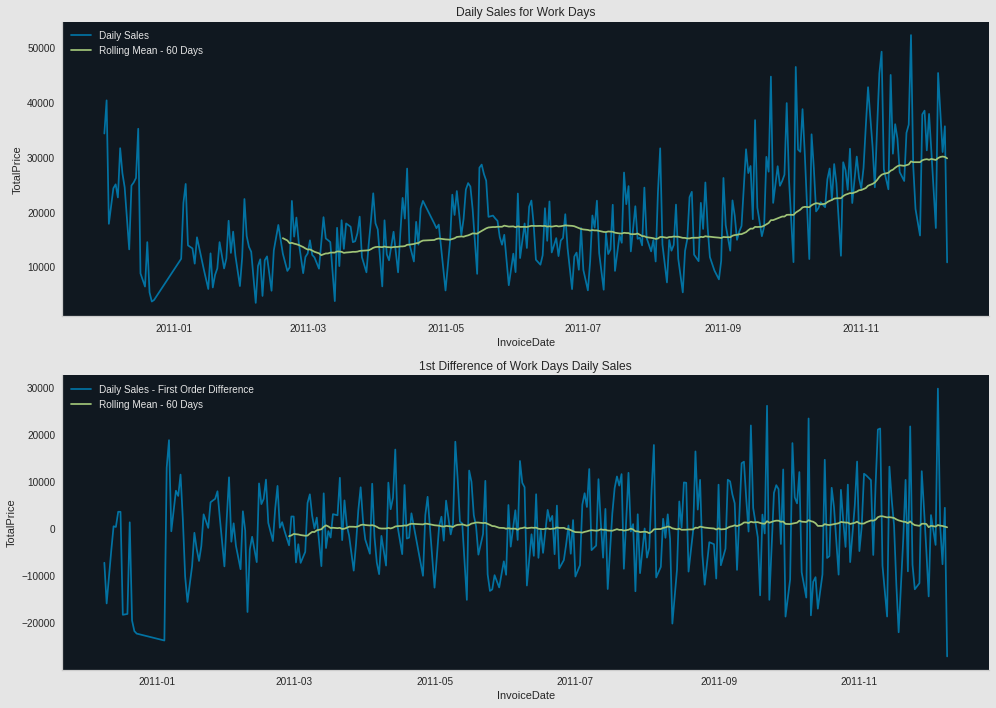

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (14, 10), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#101820")

sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice, 
             ax = axes[0], label = "Daily Sales").set_title("Daily Sales for Work Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice.rolling(60).mean(), 
             ax = axes[0], label = "Rolling Mean - 60 Days")

sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice.diff(7), 
             ax = axes[1], label = "Daily Sales - First Order Difference").set_title("1st Difference of Work Days Daily Sales")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.TotalPrice.diff(7).rolling(60).mean(), 
             ax = axes[1], label = "Rolling Mean - 60 Days")

for ax in axes: ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")

sns.despine()
plt.tight_layout()
plt.show()

Now we have a constant mean over time. Let's look at ADF test results of 1st order differenced series.

In [ ]:
print("Performing Augmented Dickey-Fuller test for 1st Difference Revenue (All Days)")
check_adf(daily_sales["TotalPrice"].diff(7).dropna())

print("\nPerforming Augmented Dickey-Fuller test for 1st Difference of Work Days Sales")
check_adf(daily_sales_workdays["TotalPrice"].diff(6).dropna())

Performing Augmented Dickey-Fuller test for 1st Difference Revenue (All Days)
H0: TotalPrice is non-stationary.
H1: TotalPrice is stationary.

ADF test statistic: -7.2073758137568165
p-value: 2.281534697623703e-10
Number of lags: 13

Critical Values : 

	 1% 	 -3.4490114443793214
	 5% 	 -2.8697627072503757
	 10% 	 -2.5711506161673716

For 0.05 significance level: 

We can reject null hypothesis. This series is stationary.

Performing Augmented Dickey-Fuller test for 1st Difference of Work Days Sales
H0: TotalPrice is non-stationary.
H1: TotalPrice is stationary.

ADF test statistic: -6.3371814685019165
p-value: 2.8118996361638424e-08
Number of lags: 11

Critical Values : 

	 1% 	 -3.453342167806272
	 5% 	 -2.871663828287282
	 10% 	 -2.572164381381345

For 0.05 significance level: 

We can reject null hypothesis. This series is stationary.


We make the series stationary. Let's decompose and examine its components.

[take me to the top](#section-top)

<a id="section-five-three"></a>

# 8.3) Seasonality, Decomposition

In [ ]:
decompose = seasonal_decompose(daily_sales["TotalPrice"], period = 7)

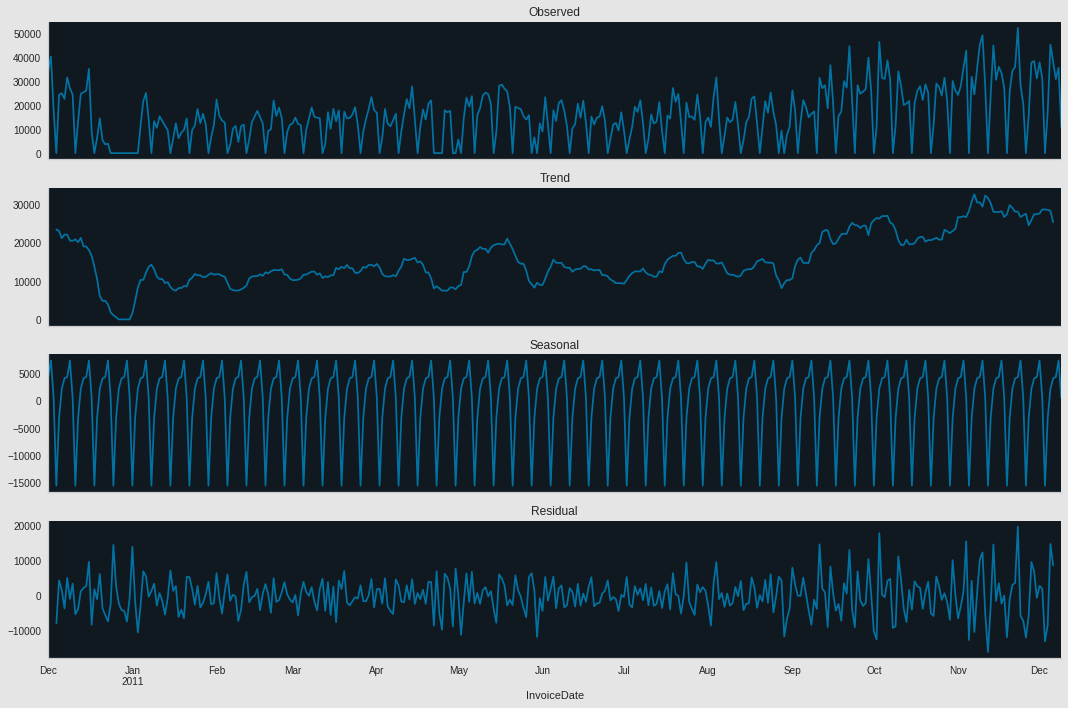

In [ ]:
fig, axes = plt.subplots(4, 1, sharex = True, figsize = (15, 10), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#101820")

decompose.observed.plot(ax = axes[0]).set_title("Observed")
decompose.trend.plot(ax = axes[1]).set_title("Trend")
decompose.seasonal.plot(ax = axes[2]).set_title("Seasonal")
decompose.resid.plot(ax = axes[3]).set_title("Residual")

sns.despine()
plt.tight_layout()
plt.show()

We can see trend, seasonal component and residual. We know we have weekly seasonality.

We need normal distributed residual. Let's look at it.

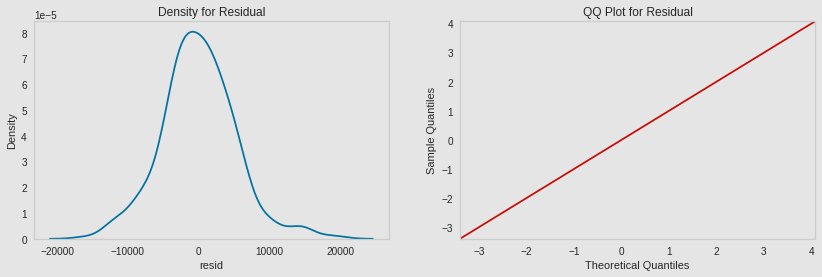

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#e5e5e5")
    
sns.kdeplot(decompose.resid, ax = axes[0]).set_title("Density for Residual")

with warnings.catch_warnings(): 
    warnings.simplefilter("ignore")
    
    sm.qqplot(decompose.resid.dropna(), ax = axes[1], marker = "x", line = "45", fit = True)
    axes[1].set_title("QQ Plot for Residual")
    
plt.show()

As we can see kde plot and QQ plot, residual has normal distribution.

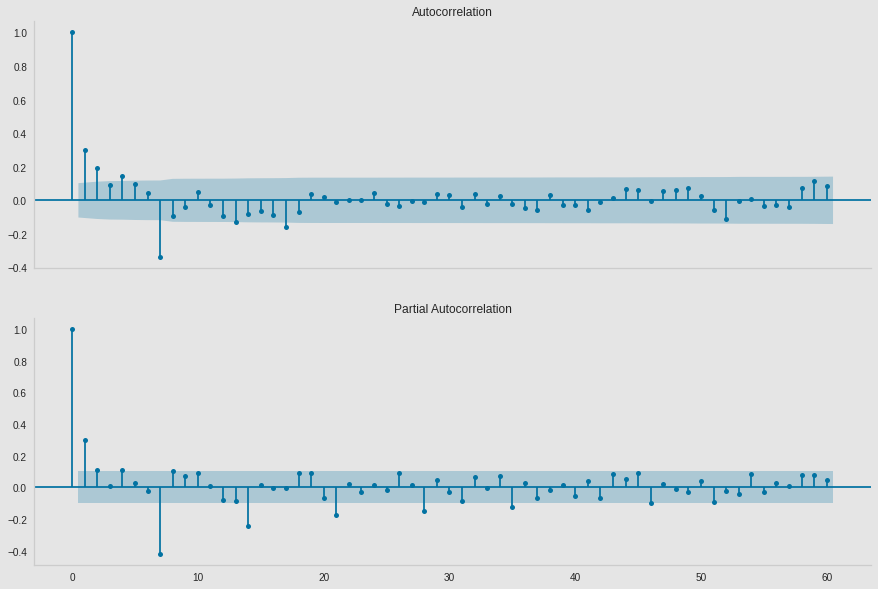

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, sharex = True, figsize = (15, 10), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#e5e5e5")
    
plot_acf(daily_sales["TotalPrice"].diff(7).dropna(), lags = 60, ax = axes[0]) # differencing with period 7
plot_pacf(daily_sales["TotalPrice"].diff(7).dropna(), lags = 60, ax = axes[1])

sns.despine()
plt.show()

[take me to the top](#section-top)

<a id="section-five-four"></a>

# 8.4) Modelling

We will use daily sales data for model training. We have 0 values on saturdays, it is fixed. We can get rid of these records with subsetting the data.

For training set, we consider the first 80% records of all days, and remaining part is validation set.

We have one year data and after then major peak, we don't have a lot observations to predicting the behavior of data.


In [ ]:
daily_data = daily_sales[["TotalPrice"]].dropna().reset_index()

daily_data.columns = ["ds", "y"]

train_size = int(0.80 * len(daily_data))

train = daily_data.iloc[:train_size]
val = pd.DataFrame(daily_data.iloc[train_size:])

print(f"Training Days:\t\t{len(train)} \nValidation Days:\t {len(val)}")

Training Days:		299 
Validation Days:	 75


For this problem the metrics used are R2, mean squared error and correlation. 

In [ ]:
def scores(y_true, y_pred):
    print(f"R2: {r2_score(y_true, y_pred)}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"Correlation: {np.corrcoef(y_true, y_pred)[0][1]}")

[take me to the top](#section-top)

<a id="section-five-four-one"></a>

# 8.4.1) Simple Model

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 126 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637633 sha256=f3c128637a2c4cd3dbafa877bb6784e8fa6641f9a3e507274fcab7fee8f28db9
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from fbprophet import Prophet

model = Prophet()

model.fit(train)

val_pred = model.predict(val)
train_pred = model.predict(train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
print("For Training set: \n")
scores(train.y, train_pred.yhat)

print("\nFor Validation set: \n")
scores(val.y, val_pred.yhat)

For Training set: 

R2: 0.5113478861012368
MSE: 39238224.00418612
RMSE: 6264.042145786228
Correlation: 0.7151543673243199

For Validation set: 

R2: 0.07361870065179255
MSE: 160252814.86450246
RMSE: 12659.100081147255
Correlation: 0.8114720146970709


First model is a simple prophet model with default parameters.We have 51% R Square Score for training and 7.3% R Square Score for validation set.

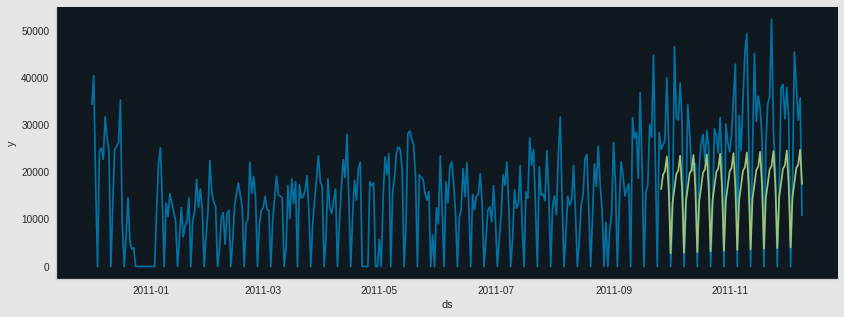

In [ ]:
fig, ax = plt.subplots(figsize = (14, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

sns.lineplot(x = daily_data.ds, y = daily_data.y, ax = ax)
sns.lineplot(x = val_pred.ds, y = val_pred.yhat, ax = ax)

sns.despine()
plt.show()

It seems, the model does not capture huge peaks.

Let's add some parameters.

[take me to the top](#section-top)

<a id="section-five-four-two"></a>

# 8.4.2) Prophet's parameters

We can add holidays to prophet model with below format.

We add "Black Friday" as a holiday for three years.

In [ ]:
black_friday = pd.DataFrame(
    {
        "holiday": "black friday",
        "ds": pd.to_datetime(["2011-11-24", "2012-11-23", "2013-11-22"]),
        "lower_window": 0,
        "upper_window": 1
    }
)

In saturdays, we don't have any sale record. We will simply add "is_saturday" column as an extra regressor.

In [ ]:
def is_saturday(ds):
    date = pd.to_datetime(ds)
    return date.day_name() == "Saturday"

daily_data["is_saturday"] = daily_data["ds"].apply(is_saturday)

train = daily_data.iloc[:train_size]
val = pd.DataFrame(daily_data.iloc[train_size:])

Prophet gives lots of options in model building step.

**holidays**: You can use this for adding special days to model.

**seasonality**: If the data has seasonality, you can set daily_seasonality, weekly_seasonality, and yearly_seasonality parameters to True.

**_prior_scale**: This parameter controls the flexibility of components' affects.



Also you can use add_country_holidays(country) method for adding all holidays for a country.

In [ ]:
model = Prophet(
    holidays = black_friday,
    daily_seasonality = True, 
    weekly_seasonality = True,
    holidays_prior_scale = 1,
    seasonality_prior_scale = 5,
    changepoint_prior_scale = 1,
)

model.add_country_holidays(country_name = "UK")

model.add_regressor("is_saturday")

model.fit(train)

val_pred = model.predict(val)
train_pred = model.predict(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
print("For Training set: \n")
scores(train.y, train_pred.yhat)

print("\nFor Validation set: \n")
scores(val.y, val_pred.yhat)

For Training set: 

R2: 0.7171611484884773
MSE: 22711646.787217457
RMSE: 4765.673802015562
Correlation: 0.8469617190107227

For Validation set: 

R2: 0.5746530397441691
MSE: 73579904.64943041
RMSE: 8577.872967666892
Correlation: 0.8156981392755386


We get 57.47% R Square Score for validation. Let's plot that results.

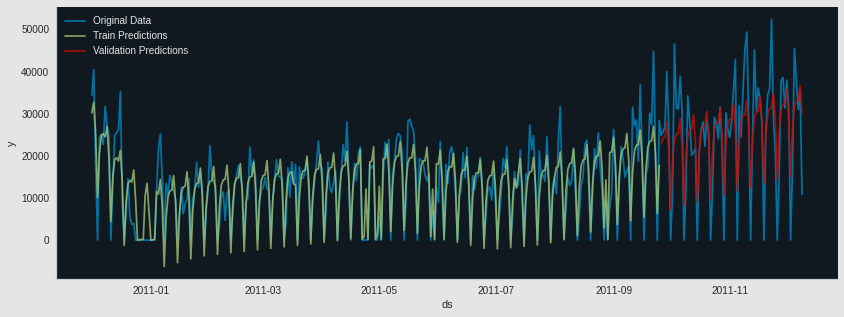

In [ ]:
fig, ax = plt.subplots(figsize = (14, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

sns.lineplot(x = daily_data.ds, y = daily_data.y, ax = ax, label = "Original Data")
sns.lineplot(x = train_pred.ds, y = train_pred.yhat, alpha = 0.8, ax = ax, label = "Train Predictions")
sns.lineplot(x = val_pred.ds, y = val_pred.yhat, ax = ax, alpha = 0.8, label = "Validation Predictions")

ax.legend(labelcolor = "#e5e5e5", facecolor = "#101820")
sns.despine()
plt.show()

We have a problem, we get negative valued forecasts.
To get rid of this, we will manually set them to zero.

In [ ]:
train_pred["yhat"] = np.where((train_pred.is_saturday == 0), train_pred.yhat, 0)
val_pred["yhat"] = np.where((val_pred.is_saturday == 0), val_pred.yhat, 0)

print("For Training set: \n")
scores(train.y, train_pred.yhat)

print("\nFor Validation set: \n")
scores(val.y, val_pred.yhat)

For Training set: 

R2: 0.7346422620130042
MSE: 21307932.71577869
RMSE: 4616.051637035562
Correlation: 0.8578247982880061

For Validation set: 

R2: 0.6751995610737641
MSE: 56186566.63706101
RMSE: 7495.769916230154
Correlation: 0.83668989478526


67.25% R Square Score for validation set, and it is increasing which is a good sign.

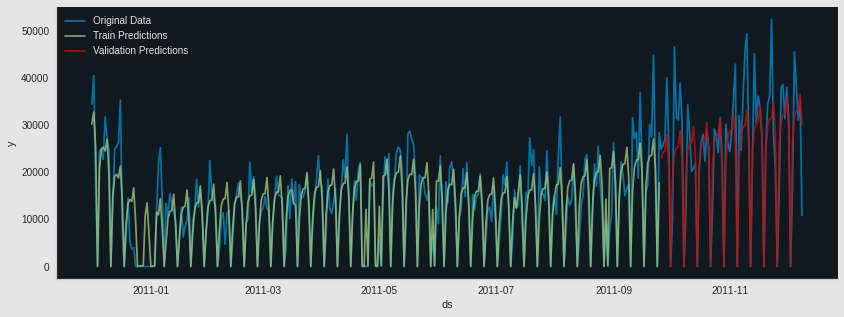

In [ ]:
fig, ax = plt.subplots(figsize = (14, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

sns.lineplot(x = daily_data.ds, y = daily_data.y, ax = ax, label = "Original Data")
sns.lineplot(x = train_pred.ds, y = train_pred.yhat, alpha = 0.8, ax = ax, label = "Train Predictions")
sns.lineplot(x = val_pred.ds, y = val_pred.yhat, ax = ax, alpha = 0.8, label = "Validation Predictions")

ax.legend(labelcolor = "#e5e5e5", facecolor = "#101820")
sns.despine()
plt.show()

Our model can not capture sudden peaks well. Actually, we have to investigate the reasons underlying this peaks. Is it yearly seasonal, or not? We can not detect it since we have only one year data.

[take me to the top](#section-top)

<a id="section-five-four-three"></a>

# 8.4.3) Forecasting Future

Now, We will build a new model for forecasting next year. We will just add yearly seasonality to last model that we used.

In [ ]:
model = Prophet(
    holidays = black_friday,
    daily_seasonality = True, 
    weekly_seasonality = True,
    yearly_seasonality = True,
    holidays_prior_scale = 1,
    seasonality_prior_scale = 5,
    changepoint_prior_scale = 1,
)

model.add_country_holidays(country_name = "UK")

model.add_regressor("is_saturday")

model.fit(daily_data)

In [ ]:
future = model.make_future_dataframe(periods = 365)

future["is_saturday"] = future["ds"].apply(is_saturday)
future.tail()

,ds,is_saturday
734,2012-12-04,False
735,2012-12-05,False
736,2012-12-06,False
737,2012-12-07,False
738,2012-12-08,True


In [ ]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
734,2012-12-04,33125.712989,25816.745499,40475.827852
735,2012-12-05,32665.353117,25201.313128,39674.238111
736,2012-12-06,35280.639684,28084.136387,42320.104036
737,2012-12-07,27413.303377,20448.685316,34374.764420
738,2012-12-08,9623.309364,2049.470940,16833.340082


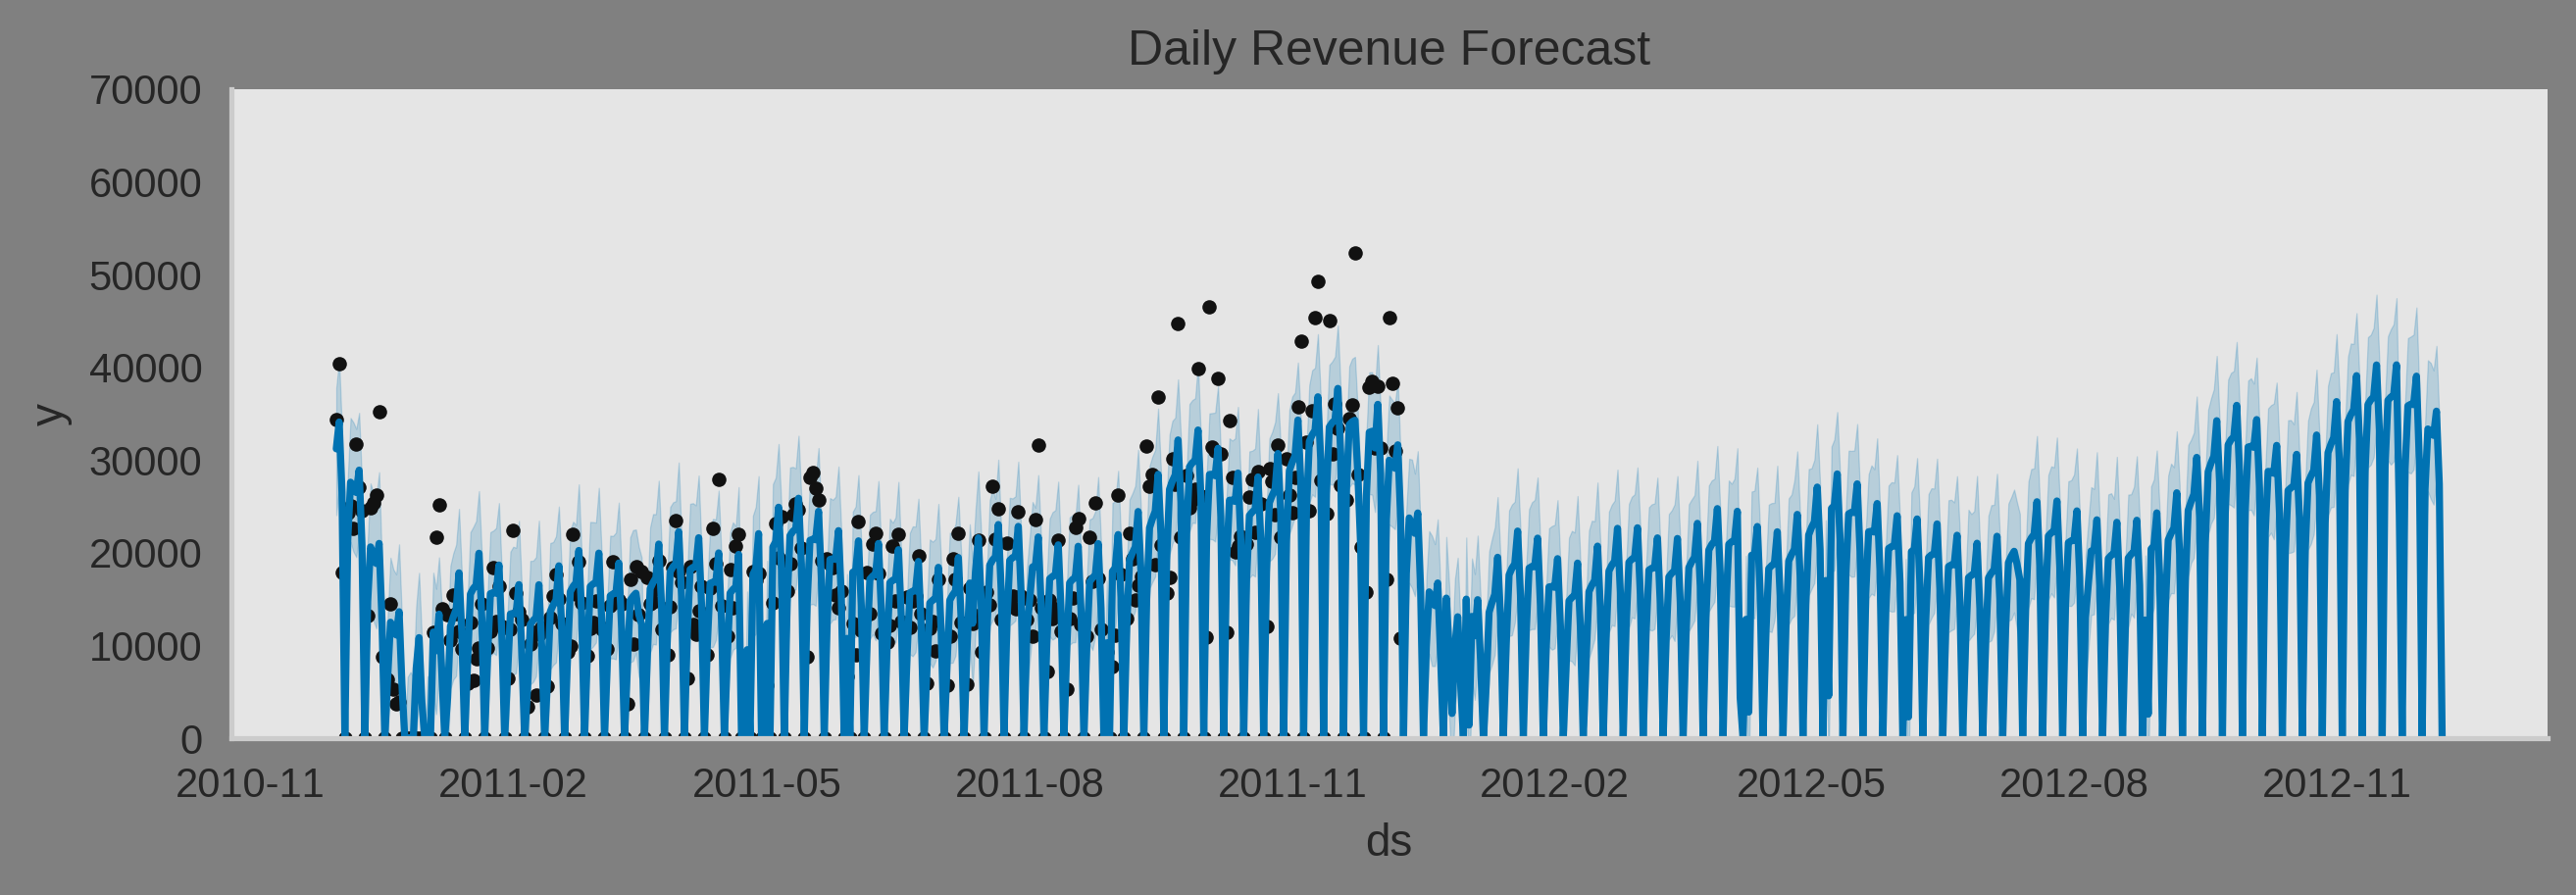

In [ ]:
forecast["yhat"] = np.where((forecast.is_saturday == 0), forecast.yhat, 0)
forecast["yhat_lower"] = np.where((forecast.is_saturday == 0), forecast.yhat_lower, 0)
forecast["yhat_upper"] = np.where((forecast.is_saturday == 0), forecast.yhat_upper, 0)

fig, ax = plt.subplots(figsize = (9, 3), facecolor = "grey", dpi = 300)

model.plot(forecast, ax = ax)

ax.set_title("Daily Revenue Forecast")
ax.grid(False)
ax.set_facecolor("#e5e5e5")
ax.set_ylim(0, 70000)

sns.despine()
plt.show()

Here is the results of this year's predictions and next year's forecast. Black dots represent actual revenue, and blue lines represent forecasts.

In the last months of the year, our predictions on the border of upper confidence interval, or sometimes outside of it.

If we look at next year's forecast, we can see minor peaks in the middle of the year, and also we have positive trend late of the year.

[take me to the top](#section-top)

<a id="section-conc"></a>

# Conclusion

1.In conclusion, after performing data cleaning and thorough Exploratory Data Analysis we observe that the customers from United Kingdom have the highest number of transactions and the highest revenue is generated from the same country due to the purchasing of expensive items.

2.We also observe the sales trend to peak especially at November and December as people buy gifts for their loved ones at that time of the year.

3.After plotting the following graphs:
   Country vs total price
   Country vs unit price
   Country vs Quantity

We can conclude that despite having the maximum number of customers using the retail store, the people of the United Kingdom tend to spend lesser money on the gifts compared to people of other countries and tend to spend money on lesser number of gifts.

The low unit cost and total spending of the people of the United Kingdom can be attributed to the fact that since the United Kingdom has the most number of customers and sales(wrt the number of items purchased). 

It will be easier for the company to maintain large stock of products, it will also be easier for the company to maintain supply chains in and around the United Kingdom which will help the company reduce labour and other expenses which causes the reduction in the price of the items sold.

4.Some countries tend to have bigger average prices in carts like  Australia, Japan, Sweden and the Netherlands (which can either be due to people's choices or due to products themselves becoming more expensive).

There are differencies in the best-selling items based on the country. The best-selling item overall is the white hanging heart t-light holder which is not the case when checked seperately for each country.

Customers tend to buy items well in advance before christmas probably fearing an absence of stock during the days christmas comes near. 

5.We also observe Retention rate increases significantly for last months of the year.Probably, Thanksgiving, Black Friday and Christmas causes it. There are lots of festive days at the end of year.

6. From **Pareto Analysis**, We can see that 80% of company's revenue comes from top 30% of customers. Also, 90% of company's revenue comes from top 48% of customers

We also see that 80% of company's revenue comes from top 23% of products that have most revenue.Also, 90% of company's revenue comes from 36% of products that have most revenue.
Maybe, if the company reduce by half its variety of items, revenue couldn't decrease significantly.

7.**Customer Lifetime Value** is predicted which gives the retail store owner an idea about how valuable a specific customer is currently and how valuable will the customer be in the future.

8.After **RFM Customer Segmentation** we see that there are 15% of customers considered as Champions.These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping improving their experience.

RFM Analysis separated all the customers into 10 informative categories based on their recency, frequency and monetary.

9.Both Silhoutte's and Elbow Method give the optimal value of k as 4.
Elbow method only takes euclidean distance into account whereas silhouette score takes variance, skewness, high-low differences (multiple criteria) into account. 

10.Since the optimal value of k is 4, KMeans Clustering separated the customers into 4 clusters that have similarities based on their recency, frequency and monetary. This time the categories are more flexible and not based on a grade.

From RFM and Kmeans,  we learnt that there are a few exceptional customers that we would want to keep offering them discounts, or an ambassador title. There is also a quarter of the customers that are not really active and don't spend a lot.

11.Using **Apriori Algorithm** we obtain the frequently purchased items and association rules like confidence and lift based on the minimum threshold support value. 

12.Ultimately we perform forecasting via Prophet Model and we observe that:
In the last months of the year, our predictions are on the border of upper confidence interval, or sometimes outside of it and if we look at next year's forecast, we observe minor peaks in the middle of the year, and the overall trend of the revenue vs days graph tends to be positive which is good for the retail store owner. 



[take me to the top](#section-top)